<a href="https://colab.research.google.com/github/burakayy7/deep_learning_bifurcation_prediction_collection_V1/blob/main/dlews_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install all Software Packages

- Ewstools
- EWSofInfectiousDiseases.git
- clone ewstools
- tensorflow, numpy, pandas, scipy, and scikit-learn versions that are all compatible with all other software packages

**Note: If running via Google Colab, make sure to "Restart Session" after initial installations, then re-run below cell for Colab to use the correct versions**

In [1]:
'''
make sure to restart session before continuing after running this cell, to ensure correct versions of libraries
are installed.
'''

# Install Dependencies
!pip install --no-cache-dir ewstools==2.1.2
# !pip install ewstools==2.1.2
!git clone https://github.com/AmitKChakraborty/EWSofInfectiousDiseases.git
!git clone https://github.com/ThomasMBury/ewstools
# !pip install numpy==2.2.2

!pip install --no-cache-dir tensorflow==2.14

!pip install --no-cache-dir numpy==2.2.3
!pip install --no-cache-dir pandas==2.2.2 scipy==1.10.1 scikit-learn==1.2.2



fatal: destination path 'EWSofInfectiousDiseases' already exists and is not an empty directory.
fatal: destination path 'ewstools' already exists and is not an empty directory.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 269.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.10.1 requires numpy<1.27.0,>=1.19.5, but you have numpy 2.2.3 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.14.0 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 230.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.14.0 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
tensorstore 0.1.74 requires ml_dtypes>=0.3.1, but you have ml-dtypes 0.2.0 which is incompatible.
xarray-einstats 0.9.0 requires

# Requirements (Libraries)

In [2]:
import os
# os._exit(0)
# print(numpy.__version__)
# print(pd.__version__)


In [3]:
import os

import pandas as pd
from datetime import datetime


import numpy as np
np.random.seed(0) # Set seed for reproducibility

import matplotlib.pyplot as plt

import os.path
from os import path

import ewstools
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import gc
import numpy as np
import pandas as pd
import random
import sys
import itertools

import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import load_model

# from tensorflow import keras

from tensorflow.python.keras.models import load_model
# import tensorflow.compact.v2.keras
# from tf.compat.v2.keras.models import load_model
from datetime import datetime



# random.seed(datetime.now())
random.seed(datetime.now().timestamp())
# Tensorflow imports

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # comment out to see TensorFlow warnings

import requests

2.14.0


# Get Data (COVID) | Format for Deep Learning Inference

In [4]:
# create the folder

remove_data = True

state_data_path = '/content/state_data'
predictions_path = '/content/predictions2'
ensemble_predictions_path = '/content/predictions2/ensemble'

used_column = 'value'
# used_column = 'weekly_rate'

# VARIABLES USED FOR ESTIMATING R0
#-------------------------#
R_ESTIMATE = True
data_path_for_epyestim = '/content/state_data_epyestim'

#-------------------------#

if path.exists(state_data_path) == False:
  os.mkdir(state_data_path)
elif remove_data:
  !rm -rf state_data_path/*
if path.exists(data_path_for_epyestim) == False and R_ESTIMATE:
  os.mkdir(data_path_for_epyestim)

if path.exists(predictions_path) == False:
  os.mkdir(predictions_path)
if not os.path.exists(predictions_path):
    os.makedirs(predictions_path)
if not os.path.exists(ensemble_predictions_path):
    os.makedirs(ensemble_predictions_path)


In [5]:
!rm -rf state_data_path/*

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df

UID iso2 iso3  code3     FIPS      Admin2 Province_State  \
0     84001001   US  USA    840   1001.0     Autauga        Alabama   
1     84001003   US  USA    840   1003.0     Baldwin        Alabama   
2     84001005   US  USA    840   1005.0     Barbour        Alabama   
3     84001007   US  USA    840   1007.0        Bibb        Alabama   
4     84001009   US  USA    840   1009.0      Blount        Alabama   
...        ...  ...  ...    ...      ...         ...            ...   
3337  84056039   US  USA    840  56039.0       Teton        Wyoming   
3338  84056041   US  USA    840  56041.0       Uinta        Wyoming   
3339  84090056   US  USA    840  90056.0  Unassigned        Wyoming   
3340  84056043   US  USA    840  56043.0    Washakie        Wyoming   
3341  84056045   US  USA    840  56045.0      Weston        Wyoming   

     Country_Region        Lat       Long_  ... 2/28/23  3/1/23  3/2/23  \
0                US  32.539527  -86.644082  ...   19732   19759   19759   
1                US  30.727750  -87.722071  ...   69641   69767   69767   
2                US  31.868263  -85.387129  ...    7451    7474    7474   
3                US  32.996421  -87.125115  ...    8067    8087    8087   
4                US  33.982109  -86.567906  ...   18616   18673   18673   
...             ...        ...         ...  ...     ...     ...     ...   
3337             US  43.935225 -110.589080  ...   12130   12130   12130   
3338             US  41.287818 -110.547578  ...    6401    6401    6401   
3339             US   0.000000    0.000000  ...       0       0       0   
3340             US  43.904516 -107.680187  ...    2750    2750    2750   
3341             US  43.839612 -104.567488  ...    1905    1905    1905   

      3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0      19759   19759   19759   19759   19759   19790   19790  
1      69767   69767   69767   69767   69767   69860   69860  
2       7474    7474    7474    7474    7474    7485    7485  
3       8087    8087    8087    8087    8087    8091    8091  
4      18673   18673   18673   18673   18673   18704   18704  
...      ...     ...     ...     ...     ...     ...     ...  
3337   12130   12130   12130   12130   12134   12134   12134  
3338    6401    6401    6401    6401    6406    6406    6406  
3339       0       0       0       0       0       0       0  
3340    2750    2750    2750    2750    2755    2755    2755  
3341    1905    1905    1905    1905    1905    1905    1905  

[3342 rows x 1154 columns]

In [30]:
us_total = df.iloc[:, 11:].sum()

us_df = pd.DataFrame({
    "date": pd.to_datetime(us_total.index, format="%m/%d/%y"),
    "US_confirmed": us_total.values
})

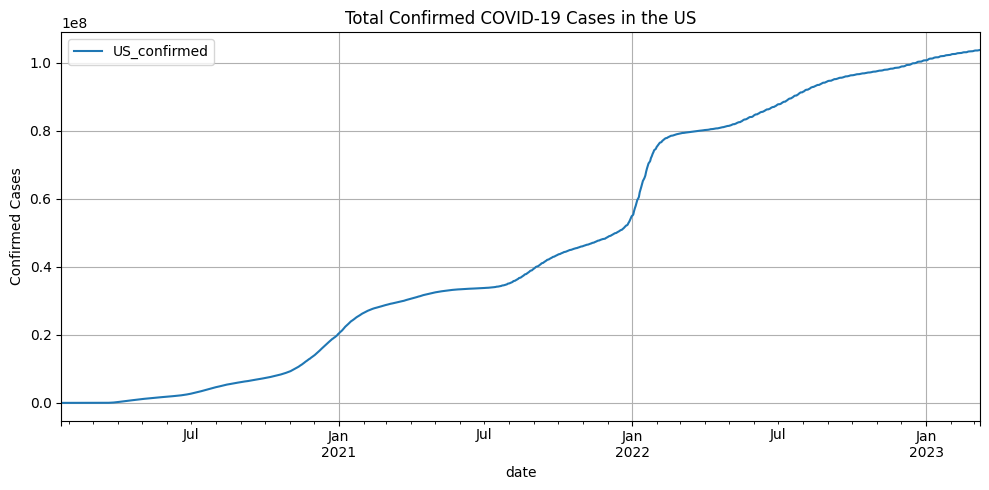

In [32]:
import matplotlib.pyplot as plt

us_df.plot(x="date", y="US_confirmed", title="Total Confirmed COVID-19 Cases in the US", figsize=(10, 5))
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Export to CSV
us_df.to_csv("us_total.csv", index=False)

In [ ]:
ews_data = 0
ts = 0
# data = pd.read_csv('https://github.com/cdcepi/FluSight-forecast-hub/blob/09a9d11e52413297732c83d36bcdd8e1a0a13fc9/target-data/target-hospital-admissions.csv')
data = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
# data = pd.read_csv('https://raw.githubusercontent.com/cdcepi/FluSight-forecast-hub/main/target-data/target-hospital-admissions.csv')

# data = data.reindex(index=data.index[::-1])
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.sort_values(by='date').reset_index(drop=True)

input_array = {}

states = data['location_name'].unique()

# for state in states:
#   state_data = data.query(f'location_name == "{state}"')
#   print(len(state_data))

print(data.iloc[1])
print(data.iloc[54])
print(data.iloc[107])

def get_time_series(data, start, end):
    if end > len(data):
        end = int(len(data))
    if start < 0:
        start = 0

    ts_sub = subset_reset = data[start:end].reset_index(drop=True)
    # print(ts_sub)
    ts = ewstools.TimeSeries(data=ts_sub, transition=end-start)
    # ts.state.dropna(inplace=True)
    ts.state = ts.state.fillna(0)
    ts.detrend(method='Lowess', span=0.2)

    residuals = ts.state.iloc[:, 0].values if ts.state.ndim > 1 else ts.state.values

    avg_abs_residuals = np.mean(np.abs(residuals))

    normalized_residuals = residuals / avg_abs_residuals


    ts.state = pd.Series(normalized_residuals, index=ts.state.index)

    ts.state = ts.state.rename('residuals')

    return ts.state

# Function to get the time series to be stored for R0 Estimation
def get_time_series_epyestim(data, start, end):
    if end > len(data):
        end = int(len(data))
    if start < 0:
        start = 0

    ts_sub = subset_reset = data[start:end]


    ts_sub = ts_sub.fillna(0)


    return ts_sub

from_time = 0
to_time = 160



for state in states:
  state_data = data.query(f'location_name == "{state}"').sort_values(by='date')
  ews_data = state_data[['date', used_column]]

  ews_data = ews_data.set_index('date')[used_column]
  # ews_data.sort_index()
  epyestim_data = ews_data.copy()
  ews_data = ews_data.reset_index(drop=True)

  # target_ts_length = len(ews_data)

  target_ts_length = to_time

  input_array[state] = ews_data.iloc[from_time:target_ts_length]

  # input_array[state].plot()

  # Pad the data at the beginning
  padding_len = target_ts_length - len(ews_data)
  if padding_len > 0:
      padding = pd.Series(np.zeros(padding_len), dtype=ews_data.dtype)
      # pad_dates = pd.date_range(
      #     end=sliced_ews_data.index[0] - pd.Timedelta(weeks=1),
      #     periods=padding_len,
      #     freq='W'
      # )
      # padding = pd.Series(np.zeros(padding_len), index=pad_dates, dtype=ews_data.dtype)
      ews_data = pd.concat([padding, ews_data], ignore_index=True)
      epyestim_data = pd.concat([padding, epyestim_data], ignore_index=True)


  ts_out = get_time_series(ews_data, from_time, target_ts_length)
  ts_out.to_csv(f'{state_data_path}/{state}_data.csv', index=True, header=True)

  ts_out_epyestim = get_time_series_epyestim(epyestim_data, from_time, target_ts_length)
  ts_out_epyestim.to_csv(f'{data_path_for_epyestim}/{state}_data.csv', index=True, header=True)

# ts = get_time_series(ews_data, from_time, to_time)
# ts.to_csv('flu_data.csv', index=True, header=True)

date             2022-02-05 00:00:00
location                          20
location_name                 Kansas
value                            9.0
weekly_rate                 0.306066
Name: 1, dtype: object
date             2022-02-12 00:00:00
location                          40
location_name               Oklahoma
value                           68.0
weekly_rate                 1.677429
Name: 54, dtype: object
date             2022-02-19 00:00:00
location                          40
location_name               Oklahoma
value                           74.0
weekly_rate                 1.825437
Name: 107, dtype: object


<Axes: >

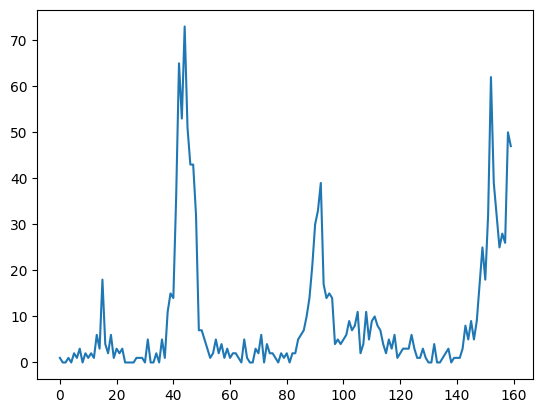

In [ ]:
ews_data[from_time: target_ts_length].plot()

# Estimate the Reproduction Number (Rt) using EpyEstim

In [18]:
!pip install epyestim

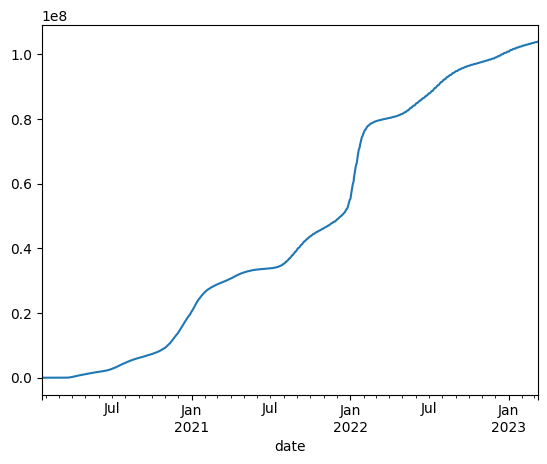

In [42]:
import epyestim
from epyestim import bagging_r
from epyestim import discrete_distrb
from scipy.stats import gamma

# --- Step 1: Load weekly incidence data ---
us_data_path_epyestim = '/content/us_total.csv'

us_data = pd.read_csv(us_data_path_epyestim, index_col='date', parse_dates=True)['US_confirmed'].sort_index()
us_data.plot()
weekly_incidence = us_data
# --- Step 2: Define a helper function to construct PMFs ---
def make_pmf(mean, std, min_val=1e-6):
    shape = (mean / std) ** 2
    scale = (std ** 2) / mean
    cont = gamma(a=shape, scale=scale)
    pmf = discrete_distrb(cont)
    pmf[pmf == 0] = min_val
    return pmf / pmf.sum()

mean_si = 3.96
std_si = 4.75
mean_delay = 6.5
std_delay = 3.8


# --- Step 3A: Define weekly SI and delay PMFs (used if you want to keep data weekly) ---
si_distrb_weekly = make_pmf(mean_si / 7, std_si / 7)
delay_distrb_weekly = make_pmf(mean_delay / 7, std_delay / 7)

# --- Step 3B: (Optional) Convert weekly incidence to daily if you want to use daily PMFs ---
daily_vals = np.repeat(weekly_incidence.values / 7, 7)
daily_dates = pd.date_range(start=weekly_incidence.index[0], periods=len(daily_vals), freq='D')
daily_incidence = pd.Series(daily_vals, index=daily_dates)

si_distrb_daily = make_pmf(mean_si, std_si)
delay_distrb_daily = make_pmf(mean_delay, std_delay)

# === TOGGLE: Use WEEKLY or DAILY ===
use_daily = True

if use_daily:
    incidence = us_data
    si_pmf = si_distrb_daily
    delay_pmf = delay_distrb_daily
    smoothing_window = 21
else:
    incidence = weekly_incidence
    si_pmf = si_distrb_weekly
    delay_pmf = delay_distrb_weekly
    smoothing_window = 1

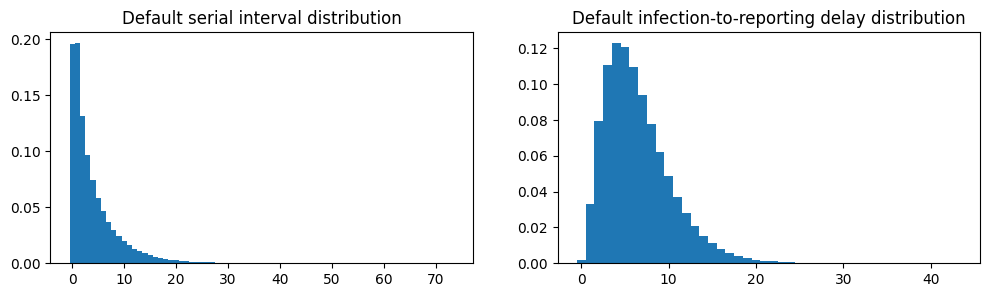

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(12,3))

axs[0].bar(range(len(si_pmf)), si_pmf, width=1)
axs[1].bar(range(len(delay_pmf)), delay_pmf, width=1)

axs[0].set_title('Default serial interval distribution')
axs[1].set_title('Default infection-to-reporting delay distribution')
plt.show()

In [44]:
# --- Step 4: Estimate Rt ---
rt = bagging_r(
    incidence,
    gt_distribution=si_pmf,
    delay_distribution=delay_pmf,
    a_prior=1,
    b_prior=5,
    smoothing_window=smoothing_window,
    n_samples=1,
    r_window_size=5  # Optional: use this to average over windows
)

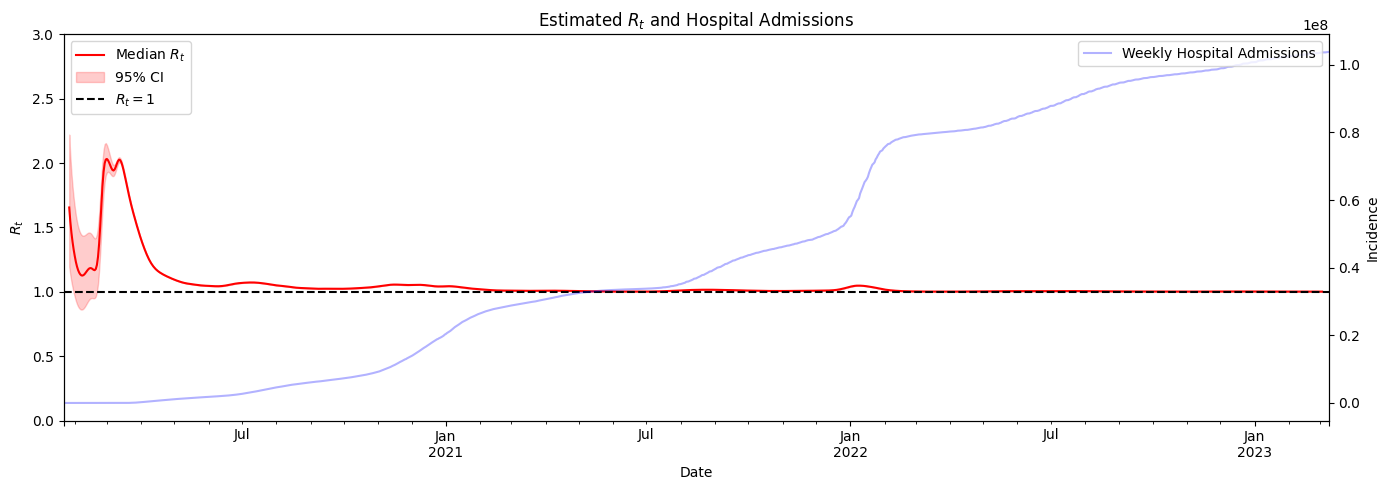

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5))

# Plot Rt
rt['Q0.5'].plot(ax=ax, color='red', label='Median $R_t$')
ax.fill_between(rt.index, rt['Q0.025'], rt['Q0.975'], color='red', alpha=0.2, label='95% CI')
ax.axhline(y=1, color='black', linestyle='--', label='$R_t = 1$')
ax.set_ylabel('$R_t$')
ax.set_xlabel('Date')
ax.set_ylim([0, 3])
ax.set_title('Estimated $R_t$ and Hospital Admissions')
ax.legend(loc='upper left')

# Plot incidence on secondary y-axis
ax2 = ax.twinx()
us_data.plot(ax=ax2, color='blue', alpha=0.3, label='Weekly Hospital Admissions')
ax2.set_ylabel('Incidence')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


rt_crossings = []

rt_series = rt['Q0.5']

# Iterate through raw values
for i in range(1, len(rt_series)):
    prev_val = rt_series.iloc[i - 1]
    curr_val = rt_series.iloc[i]

    # Check for upward crossing: from <1 to >1
    if prev_val < 1.0 and curr_val > 1.0:
        date = rt_series.index[i]
        value = curr_val
        rt_crossings.append((round(i/7), date, value))  # (row number, date, value)

# Convert to DataFrame
rt_crossings_df = pd.DataFrame(rt_crossings, columns=['row_number', 'date', 'Q0.5'])

# Save to CSV
rt_crossings_df.to_csv('/content/rt_crossings.csv', index=True, header=True)

# Optional: print
print(rt_crossings_df)

   row_number       date      Q0.5
0          26 2022-08-19  1.000580
1          64 2023-05-06  1.000010
2          75 2023-07-27  1.000392
3         129 2024-08-05  1.002719


# Apply the Model (s)

In [ ]:
use_self_trained_model = False
import zipfile
if use_self_trained_model:
  with zipfile.ZipFile('/content/best_model_1_1_length100.pkl.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/best_model_1_1_length100.pkl')

In [ ]:
# import tf_keras as k2
# for the input data, you first have to detrend using Lowess (0.2) = residual time series, then normalize it by dividing by
# the average of the entire time series
'''
Apply Noise-induced SIR model data trained DL algorithm to test models
Edited from published codes by Bury et al. (2021), Deep learning for early warning signals of tipping points, PNAS.

'''

#python libraries


classifier_length = 100                                   #classifier_length are 100 and 500
type = 'forced'                                            #types are 'forced' and 'null'
test_model = 'SIRdemN'                                    #test_models are 'SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR', 'COVID'
# NoOFSim = 10                                                #Number of simulation for each type; 7 for COVID, 10 for others
NoOFSim = 1

if not os.path.exists('/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/data/ml_pred_SIR_CL{}'.format(classifier_length)):
    os.makedirs('../data/ml_pred_SIR_CL{}'.format(classifier_length))


model_types = [1]
mult_factor_global = 5
def run_infrence(data_path, output_path, num_files=3):
  if os.path.isfile(data_path):
    state_data_files = [data_path]
  else:
    state_data_files = os.listdir(data_path)
    state_data_files = state_data_files[:num_files]
  for state_data in state_data_files:
    for simulation in np.arange(1, NoOFSim+1):

      # Filepath to residual time series to make predictions on
      # filepath = '../data/resids/resids_{}_{}{}.csv'.format(test_model, type, simulation)

      if os.path.isfile(data_path):
        filepath = data_path
      else:
        filepath = f"{data_path}/{state_data}"

      # Filepath to export ensemble DL predictions to
      # filepath_out = '../data/ml_pred_SIR_CL{}/ensemble_trend_probs_{}{}_{}_len{}.csv'.format(classifier_length, test_model, type, simulation, classifier_length)

      filepath_out = output_path

      # Type of classifier to use (500 or 100)
      ts_len = classifier_length

      '''
      The following two parameters control how many sample points along the
      timeseries are used, and the length between them.  For instance, for an input
      time series equal to or less then length 500, mult_factor=10 and
      pad_samples=50 means that it will do the unveiling in steps of 10 datapoints,
      at 50 evenly spaced points across the entire time series (50 x 10 = 500).
      Needs to be adjusted according to whether you are using the trained 500 length
      or 100 length classifier.
      '''

      # Steps of datapoints in between each DL prediction
      mult_factor = mult_factor_global

      # Total number of DL predictions to make
      pad_samples = int(classifier_length/mult_factor)

      df = pd.read_csv(filepath).dropna()
      # Length of inupt time series
      df_len = len(df)

      if df_len > ts_len:
          #df of last classifier_length=500 points
          df_last = df[-classifier_length:]
          resids = df_last['residuals'].values.reshape(1,-1,1)
          input_series = resids
          seq_len = len(df_last)
      else:
          resids = df['residuals'].values.reshape(1,-1,1)
          # Length of inupt time series
          seq_len = len(df)
          input_series = resids

      def get_dl_predictions(resids, model_type, kk):

          '''
          Generate DL prediction time series on resids
          from DL classifier with type 'model_type' and index kk.
          '''

          # Setup file to store DL predictions
          predictions_file_name = '{}/y_pred_{}_{}.csv'.format(predictions_path,kk,model_type)
          f1 = open(predictions_file_name,'w')

          # Load in specific DL classifier
          model_name = '/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/trained_DL_models_and_DL_apply/trained_models_Noise_Induced_SIR_CL{}/best_model_{}_{}_length{}.pkl'.format(classifier_length, kk,model_type, ts_len)
          # model_name = '/content/ewstools/saved_classifiers/bury_pnas_21/len500/best_model_1_1_len500.pkl'
          # model_name = '/content/best_model_1_1_length100.pkl'

          # with open(model_name, "rb") as f:
          #   model = pickle.load(f)
          # model = k2.models.load_model
          model = tf.keras.models.load_model(model_name)

          # Loop through each possible length of padding
          # Start with revelaing the DL algorith only the earliest points
          for pad_count in range(pad_samples-1, -1, -1):

              temp_ts = np.zeros((1,ts_len,1))

              ts_gap = ts_len-seq_len
              pad_length = mult_factor*pad_count

              if pad_length + ts_gap > ts_len:
                  zero_range = ts_len
              else:
                  zero_range = pad_length + ts_gap

              if zero_range == ts_len:
                  # Set all ML predictions to zero
                  y_pred = np.zeros(2).reshape(1,2)
              else:
                  for j in range(0, zero_range):
                      temp_ts[0,j] = 0
                  for j in range(zero_range, ts_len):
                      temp_ts[0,j] = resids[0,j-zero_range]

                  # normalizing inputs: take averages, since the models were also trained on averaged data.
                  values_avg = 0.0
                  count_avg = 0
                  for j in range (0,ts_len):
                      if temp_ts[0,j] != 0:
                          values_avg = values_avg + abs(temp_ts[0,j])
                          count_avg = count_avg + 1
                  if count_avg != 0:
                      values_avg = values_avg/count_avg
                  for j in range (0,ts_len):
                      if temp_ts[0,j] != 0:
                          temp_ts[0,j] = temp_ts[0,j]/values_avg

                  # Compute DL prediction
                  y_pred = model.predict(temp_ts)
                  # y_pred = y_pred[:, 2:4]



              # Write predictions to file
              np.savetxt(f1, y_pred, delimiter=',')
              print('Predictions computed for padding={}'.format(pad_count*mult_factor))

          # Delete model and do garbage collection to free up RAM
          tf.keras.backend.clear_session()
          if zero_range != ts_len:
              del model
          gc.collect()
          f1.close()

          return



      # Compute DL predictions from all 20 trained models

      # for model_type in [1,2]:
      #     for kk in np.arange(1,2):
      #         print('Compute DL predictions for model_type={}, kk={}'.format(
      #             model_type,kk))

      #         get_dl_predictions(resids, model_type, kk)
      for model_type in model_types:
          for kk in np.arange(1,2):
              print('Compute DL predictions for model_type={}, kk={}'.format(
                  model_type,kk))

              get_dl_predictions(resids, model_type, kk)




      # Compute average prediction among all 20 DL classifiers
      # list_df_preds = []
      # for model_type in [1,2]:
      #     for kk in np.arange(1,2):
      #         filename = 'predictions/y_pred_{}_{}.csv'.format(kk,model_type)
      #         df_preds = pd.read_csv(filename,header=None)
      #         df_preds['time_index'] = df_preds.index
      #         df_preds['model_type'] = model_type
      #         df_preds['kk'] = kk
      #         list_df_preds.append(df_preds)
      list_df_preds = []
      for model_type in model_types:
          for kk in np.arange(1,2):
              filename = 'predictions2/y_pred_{}_{}.csv'.format(kk,model_type)
              # print_headers = pd.read_csv(filename)
              # print(print_headers.head())
              df_preds = pd.read_csv(filename,header=None)
              df_preds['time_index'] = df_preds.index
              df_preds['model_type'] = model_type
              df_preds['kk'] = kk
              list_df_preds.append(df_preds)


      # Concatenate
      df_preds_all = pd.concat(list_df_preds).reset_index(drop=True)

      # Compute mean over all predictions
      df_preds_mean = df_preds_all.groupby('time_index').mean()
      # print(df_preds_mean.head())
      df_preds_mean = df_preds_mean[[0,1]]
      df_preds_mean = df_preds_mean.assign(b=df_preds_mean.iloc[:,[0,1]].sum(axis=1))

      # Export predictions
      if os.path.isfile(data_path):
        filepath_out_state = f"{filepath_out}/ensemble_preds_single"
      else:
        filepath_out_state = f"{output_path}/ensemble_preds_{state_data}"
      # df_preds_mean.iloc[:,[0,1,2]].to_csv(filepath_out_state,index=False,header=True) #if you want aggregated to 1 column
      df_preds_mean.iloc[:,[0,1]].to_csv(filepath_out_state,index=False,header=True) #if you don't want aggregated column



output_path = ensemble_predictions_path
# state_data_path = "/content/state_data/US_data.csv"
run_infrence(state_data_path, output_path, num_files=len(states))


Compute DL predictions for model_type=1, kk=1
1/1 [==============================] - 1s 1s/step
Predictions computed for padding=90
1/1 [==============================] - 0s 27ms/step
Predictions computed for padding=80
1/1 [==============================] - 0s 28ms/step
Predictions computed for padding=70
1/1 [==============================] - 0s 27ms/step
Predictions computed for padding=60
1/1 [==============================] - 0s 36ms/step
Predictions computed for padding=50
1/1 [==============================] - 0s 29ms/step
Predictions computed for padding=40
1/1 [==============================] - 0s 28ms/step
Predictions computed for padding=30
1/1 [==============================] - 0s 28ms/step
Predictions computed for padding=20
1/1 [==============================] - 0s 30ms/step
Predictions computed for padding=10
1/1 [==============================] - 0s 27ms/step
Predictions computed for padding=0
Compute DL predictions for model_type=1, kk=1
1/1 [==========================

# Apply TFLite Model
## Requires local .tflite saved model under "/content"

In [ ]:
# import tf_keras as k2
# for the input data, you first have to detrend using Lowess (0.2) = residual time series, then normalize it by dividing by
# the average of the entire time series
'''
Apply Noise-induced SIR model data trained DL algorithm to test models
Edited from published codes by Bury et al. (2021), Deep learning for early warning signals of tipping points, PNAS.

'''

#python libraries


classifier_length = 100                                   #classifier_length are 100 and 500
type = 'forced'                                            #types are 'forced' and 'null'
test_model = 'SIRdemN'                                    #test_models are 'SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR', 'COVID'
# NoOFSim = 10                                                #Number of simulation for each type; 7 for COVID, 10 for others
NoOFSim = 1

if not os.path.exists('/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/data/ml_pred_SIR_CL{}'.format(classifier_length)):
    os.makedirs('../data/ml_pred_SIR_CL{}'.format(classifier_length))


model_types = [1]

def run_infrence(data_path, output_path, num_files=3):
  if os.path.isfile(data_path):
    state_data_files = [data_path]
  else:
    state_data_files = os.listdir(data_path)
    state_data_files = state_data_files[:num_files]
  for state_data in state_data_files:
    for simulation in np.arange(1, NoOFSim+1):

      # Filepath to residual time series to make predictions on
      # filepath = '../data/resids/resids_{}_{}{}.csv'.format(test_model, type, simulation)

      if os.path.isfile(data_path):
        filepath = data_path
      else:
        filepath = f"{data_path}/{state_data}"

      # Filepath to export ensemble DL predictions to
      # filepath_out = '../data/ml_pred_SIR_CL{}/ensemble_trend_probs_{}{}_{}_len{}.csv'.format(classifier_length, test_model, type, simulation, classifier_length)

      filepath_out = output_path

      # Type of classifier to use (500 or 100)
      ts_len = classifier_length

      '''
      The following two parameters control how many sample points along the
      timeseries are used, and the length between them.  For instance, for an input
      time series equal to or less then length 500, mult_factor=10 and
      pad_samples=50 means that it will do the unveiling in steps of 10 datapoints,
      at 50 evenly spaced points across the entire time series (50 x 10 = 500).
      Needs to be adjusted according to whether you are using the trained 500 length
      or 100 length classifier.
      '''

      # Steps of datapoints in between each DL prediction
      mult_factor = 1

      # Total number of DL predictions to make
      pad_samples = int(classifier_length/mult_factor)

      df = pd.read_csv(filepath).dropna()
      # Length of inupt time series
      df_len = len(df)

      if df_len > ts_len:
          #df of last classifier_length=500 points
          df_last = df[-classifier_length:]
          resids = df_last['residuals'].values.reshape(1,-1,1)
          input_series = resids
          seq_len = len(df_last)
      else:
          resids = df['residuals'].values.reshape(1,-1,1)
          # Length of inupt time series
          seq_len = len(df)
          input_series = resids

      def get_dl_predictions(resids, model_type, kk):

          '''
          Generate DL prediction time series on resids
          from DL classifier with type 'model_type' and index kk.
          '''

          # Setup file to store DL predictions
          predictions_file_name = '{}/y_pred_{}_{}.csv'.format(predictions_path,kk,model_type)
          f1 = open(predictions_file_name,'w')

          # Load in specific DL classifier
          # model_name = '/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/trained_DL_models_and_DL_apply/trained_models_Noise_Induced_SIR_CL{}/best_model_{}_{}_length{}.pkl'.format(classifier_length, kk,model_type, ts_len)

          # model_name = '/content/best_model_1_1_length100.pkl'
          model_name = '/content/best_model_1_1_length100 (1).tflite'

          # with open(model_name, "rb") as f:
          #   model = pickle.load(f)
          # model = k2.models.load_model
          # Load the TFLite model and allocate tensors
          interpreter = tf.lite.Interpreter(model_path=model_name)
          interpreter.allocate_tensors()

          # Get input and output tensors.
          input_details = interpreter.get_input_details()
          output_details = interpreter.get_output_details()

          # Loop through each possible length of padding
          # Start with revelaing the DL algorith only the earliest points
          for pad_count in range(pad_samples-1, -1, -1):

              temp_ts = np.zeros((1,ts_len,1))

              ts_gap = ts_len-seq_len
              pad_length = mult_factor*pad_count

              if pad_length + ts_gap > ts_len:
                  zero_range = ts_len
              else:
                  zero_range = pad_length + ts_gap

              if zero_range == ts_len:
                  # Set all ML predictions to zero
                  y_pred = np.zeros(2).reshape(1,2)
              else:
                  for j in range(0, zero_range):
                      temp_ts[0,j] = 0
                  for j in range(zero_range, ts_len):
                      temp_ts[0,j] = resids[0,j-zero_range]

                  # normalizing inputs: take averages, since the models were also trained on averaged data.
                  values_avg = 0.0
                  count_avg = 0
                  for j in range (0,ts_len):
                      if temp_ts[0,j] != 0:
                          values_avg = values_avg + abs(temp_ts[0,j])
                          count_avg = count_avg + 1
                  if count_avg != 0:
                      values_avg = values_avg/count_avg
                  for j in range (0,ts_len):
                      if temp_ts[0,j] != 0:
                          temp_ts[0,j] = temp_ts[0,j]/values_avg

                  # Compute DL prediction
                  # y_pred = model.predict(temp_ts)

                  # Run inference
                  interpreter.set_tensor(input_details[0]['index'], temp_ts.astype(np.float32))
                  interpreter.invoke()
                  y_pred = interpreter.get_tensor(output_details[0]['index'])


              # Write predictions to file
              np.savetxt(f1, y_pred, delimiter=',')
              print('Predictions computed for padding={}'.format(pad_count*mult_factor))

          # Delete model and do garbage collection to free up RAM
          tf.keras.backend.clear_session()
          # if zero_range != ts_len:
          #     del model
          if 'model' in locals():
            del model
          gc.collect()
          f1.close()

          return



      # Compute DL predictions from all 20 trained models

      # for model_type in [1,2]:
      #     for kk in np.arange(1,2):
      #         print('Compute DL predictions for model_type={}, kk={}'.format(
      #             model_type,kk))

      #         get_dl_predictions(resids, model_type, kk)
      for model_type in model_types:
          for kk in np.arange(1,2):
              print('Compute DL predictions for model_type={}, kk={}'.format(
                  model_type,kk))

              get_dl_predictions(resids, model_type, kk)




      # Compute average prediction among all 20 DL classifiers
      # list_df_preds = []
      # for model_type in [1,2]:
      #     for kk in np.arange(1,2):
      #         filename = 'predictions/y_pred_{}_{}.csv'.format(kk,model_type)
      #         df_preds = pd.read_csv(filename,header=None)
      #         df_preds['time_index'] = df_preds.index
      #         df_preds['model_type'] = model_type
      #         df_preds['kk'] = kk
      #         list_df_preds.append(df_preds)
      list_df_preds = []
      for model_type in model_types:
          for kk in np.arange(1,2):
              filename = 'predictions2/y_pred_{}_{}.csv'.format(kk,model_type)
              # print_headers = pd.read_csv(filename)
              # print(print_headers.head())
              df_preds = pd.read_csv(filename,header=None)
              df_preds['time_index'] = df_preds.index
              df_preds['model_type'] = model_type
              df_preds['kk'] = kk
              list_df_preds.append(df_preds)


      # Concatenate
      df_preds_all = pd.concat(list_df_preds).reset_index(drop=True)

      # Compute mean over all predictions
      df_preds_mean = df_preds_all.groupby('time_index').mean()
      # print(df_preds_mean.head())
      df_preds_mean = df_preds_mean[[0,1]]
      df_preds_mean = df_preds_mean.assign(b=df_preds_mean.iloc[:,[0,1]].sum(axis=1))

      # Export predictions
      if os.path.isfile(data_path):
        filepath_out_state = f"{filepath_out}/ensemble_preds_single"
      else:
        filepath_out_state = f"{output_path}/ensemble_preds_{state_data}"
      # df_preds_mean.iloc[:,[0,1,2]].to_csv(filepath_out_state,index=False,header=True) #if you want aggregated to 1 column
      df_preds_mean.iloc[:,[0,1]].to_csv(filepath_out_state,index=False,header=True) #if you don't want aggregated column



output_path = ensemble_predictions_path
# state_data_path = "/content/state_data/US_data.csv"
run_infrence(state_data_path, output_path, num_files=len(states))


Streaming output truncated to the last 5000 lines.
Predictions computed for padding=50
Predictions computed for padding=49
Predictions computed for padding=48
Predictions computed for padding=47
Predictions computed for padding=46
Predictions computed for padding=45
Predictions computed for padding=44
Predictions computed for padding=43
Predictions computed for padding=42
Predictions computed for padding=41
Predictions computed for padding=40
Predictions computed for padding=39
Predictions computed for padding=38
Predictions computed for padding=37
Predictions computed for padding=36
Predictions computed for padding=35
Predictions computed for padding=34
Predictions computed for padding=33
Predictions computed for padding=32
Predictions computed for padding=31
Predictions computed for padding=30
Predictions computed for padding=29
Predictions computed for padding=28
Predictions computed for padding=27
Predictions computed for padding=26
Predictions computed for padding=25
Predictions c

# Online Prediction Simulation

In [ ]:
# online prediction for entire US
# start: t = 60
# end: t = 160
# time between each data point: 1 week

# used model:

classifier_length = 100                                   #classifier_length are 100 and 500
type = 'forced'                                            #types are 'forced' and 'null'
test_model = 'SIRwhiteN'                                    #test_models are 'SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR', 'COVID'
# NoOFSim = 10                                                #Number of simulation for each type; 7 for COVID, 10 for others
NoOFSim = 1

if not os.path.exists('/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/data/ml_pred_SIR_CL{}'.format(classifier_length)):
    os.makedirs('../data/ml_pred_SIR_CL{}'.format(classifier_length))


model_types = [1]

time_step = 100
time_end = 158



def run_infrence(data_path, output_path, num_files=3):
  if os.path.isfile(data_path):
    state_data_files = [data_path]
  else:
    state_data_files = os.listdir(data_path)
    state_data_files = state_data_files[:num_files]
  for state_data in state_data_files:
    for simulation in np.arange(1, NoOFSim+1):

      # Filepath to residual time series to make predictions on
      # filepath = '../data/resids/resids_{}_{}{}.csv'.format(test_model, type, simulation)

      if os.path.isfile(data_path):
        filepath = data_path
      else:
        filepath = f"{data_path}/{state_data}"

      # Filepath to export ensemble DL predictions to
      # filepath_out = '../data/ml_pred_SIR_CL{}/ensemble_trend_probs_{}{}_{}_len{}.csv'.format(classifier_length, test_model, type, simulation, classifier_length)

      filepath_out = output_path

      # Type of classifier to use (500 or 100)
      ts_len = classifier_length # 100

      '''
      The following two parameters control how many sample points along the
      timeseries are used, and the length between them.  For instance, for an input
      time series equal to or less then length 500, mult_factor=10 and
      pad_samples=50 means that it will do the unveiling in steps of 10 datapoints,
      at 50 evenly spaced points across the entire time series (50 x 10 = 500).
      Needs to be adjusted according to whether you are using the trained 500 length
      or 100 length classifier.
      '''

      # Steps of datapoints in between each DL prediction
      mult_factor = 1

      # Total number of DL predictions to make
      pad_samples = int(classifier_length/mult_factor)

      # df_initial = pd.read_csv(filepath).dropna()
      df = pd.read_csv(filepath).dropna()
      print(len(df))
      # for t in range(time_step, time_end):
        # df = df_initial[:t]
      # Length of inupt time series
      df_len = len(df)

      resids = df['residuals'].values.reshape(1,-1,1)
      seq_len = len(resids)
      input_series = resids

      # if df_len > ts_len:
      #     #df of last classifier_length=500 points
      #     df_last = df[-classifier_length:]
      #     resids = df_last['residuals'].values.reshape(1,-1,1)
      #     input_series = resids
      #     seq_len = len(df_last)
      # else:
      #     resids = df['residuals'].values.reshape(1,-1,1)
      #     # Length of inupt time series
      #     seq_len = len(df)
      #     input_series = resids

      def get_dl_predictions(resids, model_type, kk):

          '''
          Generate DL prediction time series on resids
          from DL classifier with type 'model_type' and index kk.
          '''

          # Setup file to store DL predictions
          predictions_file_name = '{}/y_pred_{}_{}.csv'.format(predictions_path,kk,model_type)
          f1 = open(predictions_file_name,'w')

          # Load in specific DL classifier
          model_name = '/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/trained_DL_models_and_DL_apply/trained_models_Noise_Induced_SIR_CL{}/best_model_{}_{}_length{}.pkl'.format(classifier_length, kk,model_type, ts_len)

          # model_name = '/content/best_model_1_1_length100.pkl'

          # with open(model_name, "rb") as f:
          #   model = pickle.load(f)
          # model = k2.models.load_model
          model = tf.keras.models.load_model(model_name)

          # Loop through each possible length of padding
          # Start with revelaing the DL algorithm only the earliest points
          for t in range(time_step, time_end):
            temp_ts = np.zeros((1,ts_len,1))
            if t < classifier_length:
              ts_gap = classifier_length-t
              for j in range(0, ts_gap):
                  temp_ts[0,j] = 0
              for j in range(ts_gap, ts_len):
                temp_ts[0,j] = resids[0,j-ts_gap]
            else:
              for j in range(0, ts_len):
                  temp_ts[0,j] = resids[0,(t-ts_len)+j]

            values_avg = 0.0
            count_avg = 0
            for j in range (0,ts_len):
              if temp_ts[0,j] != 0:
                  values_avg = values_avg + abs(temp_ts[0,j])
                  count_avg = count_avg + 1
            if count_avg != 0:
                values_avg = values_avg/count_avg
            for j in range (0,ts_len):
                if temp_ts[0,j] != 0:
                    temp_ts[0,j] = temp_ts[0,j]/values_avg

            # Compute DL prediction
            y_pred = model.predict(temp_ts)

            # Write predictions to file
            np.savetxt(f1, y_pred, delimiter=',')
            print('Predictions computed for padding={}'.format(t*mult_factor))

          # Delete model and do garbage collection to free up RAM
          tf.keras.backend.clear_session()
          # if zero_range != ts_len:
          #     del model
          del model
          gc.collect()
          f1.close()

          return




      for model_type in model_types:
          for kk in np.arange(1,2):
              print('Compute DL predictions for model_type={}, kk={}'.format(
                  model_type,kk))

              get_dl_predictions(resids, model_type, kk)

      list_df_preds = []
      for model_type in model_types:
          for kk in np.arange(1,2):
              filename = 'predictions2/y_pred_{}_{}.csv'.format(kk,model_type)
              # print_headers = pd.read_csv(filename)
              # print(print_headers.head())
              df_preds = pd.read_csv(filename,header=None)
              df_preds['time_index'] = df_preds.index
              df_preds['model_type'] = model_type
              df_preds['kk'] = kk
              list_df_preds.append(df_preds)


      # Concatenate
      df_preds_all = pd.concat(list_df_preds).reset_index(drop=True)

      # Compute mean over all predictions
      df_preds_mean = df_preds_all.groupby('time_index').mean()
      # print(df_preds_mean.head())
      df_preds_mean = df_preds_mean[[0,1]]
      df_preds_mean = df_preds_mean.assign(b=df_preds_mean.iloc[:,[0,1]].sum(axis=1))

      # Export predictions
      if os.path.isfile(data_path):
        print(state_data)
        result = "/".join(state_data.split("/")[3:])
        print(result)
        filepath_out_state = f"{filepath_out}/ensemble_preds_single_{result}"
      else:
        filepath_out_state = f"{output_path}/ensemble_preds_{state_data}"
      # df_preds_mean.iloc[:,[0,1,2]].to_csv(filepath_out_state,index=False,header=True) #if you want aggregated to 1 column
      df_preds_mean.iloc[:,[0,1]].to_csv(filepath_out_state,index=False,header=True) #if you don't want aggregated column



output_path = ensemble_predictions_path
# output_path = '/content/'
# state_data_path = "/content/state_data/US_data.csv"

us_data_path = "/content/state_data/US_data.csv"
run_infrence(state_data_path, output_path, num_files=len(states))


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step
Predictions computed for padding=136
1/1 [==============================] - 0s 34ms/step
Predictions computed for padding=137
1/1 [==============================] - 0s 36ms/step
Predictions computed for padding=138
1/1 [==============================] - 0s 30ms/step
Predictions computed for padding=139
1/1 [==============================] - 0s 33ms/step
Predictions computed for padding=140
1/1 [==============================] - 0s 30ms/step
Predictions computed for padding=141
1/1 [==============================] - 0s 27ms/step
Predictions computed for padding=142
1/1 [==============================] - 0s 28ms/step
Predictions computed for padding=143
1/1 [==============================] - 0s 28ms/step
Predictions computed for padding=144
1/1 [==============================] - 0s 31ms/step
Predictions computed for padding=145
1/1 [==============================] - 0s 29ms/step
Predict

# Online Prediction with Only 50 points in each input tensor

In [ ]:
# online prediction for entire US
# start: t = 60
# end: t = 160
# time between each data point: 1 week

# used model:

classifier_length = 100                                   #classifier_length are 100 and 500
type = 'forced'                                            #types are 'forced' and 'null'
test_model = 'SIRenvN'                                    #test_models are 'SIRwhiteN', 'SIRenvN', 'SIRdemN', 'SEIR', 'COVID'
# NoOFSim = 10                                                #Number of simulation for each type; 7 for COVID, 10 for others
NoOFSim = 1

if not os.path.exists('/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/data/ml_pred_SIR_CL{}'.format(classifier_length)):
    os.makedirs('../data/ml_pred_SIR_CL{}'.format(classifier_length))


model_types = [1]

time_step = 50
time_end = 158

window_size = 50

def run_infrence(data_path, output_path, num_files=3):
  if os.path.isfile(data_path):
    state_data_files = [data_path]
  else:
    state_data_files = os.listdir(data_path)
    state_data_files = state_data_files[:num_files]
  for state_data in state_data_files:
    for simulation in np.arange(1, NoOFSim+1):

      # Filepath to residual time series to make predictions on
      # filepath = '../data/resids/resids_{}_{}{}.csv'.format(test_model, type, simulation)

      if os.path.isfile(data_path):
        filepath = data_path
      else:
        filepath = f"{data_path}/{state_data}"

      # Filepath to export ensemble DL predictions to
      # filepath_out = '../data/ml_pred_SIR_CL{}/ensemble_trend_probs_{}{}_{}_len{}.csv'.format(classifier_length, test_model, type, simulation, classifier_length)

      filepath_out = output_path

      # Type of classifier to use (500 or 100)
      ts_len = classifier_length # 100

      '''
      The following two parameters control how many sample points along the
      timeseries are used, and the length between them.  For instance, for an input
      time series equal to or less then length 500, mult_factor=10 and
      pad_samples=50 means that it will do the unveiling in steps of 10 datapoints,
      at 50 evenly spaced points across the entire time series (50 x 10 = 500).
      Needs to be adjusted according to whether you are using the trained 500 length
      or 100 length classifier.
      '''

      # Steps of datapoints in between each DL prediction
      mult_factor = 1

      # Total number of DL predictions to make
      pad_samples = int(classifier_length/mult_factor)

      # df_initial = pd.read_csv(filepath).dropna()
      df = pd.read_csv(filepath).dropna()
      print(len(df))
      # for t in range(time_step, time_end):
        # df = df_initial[:t]
      # Length of inupt time series
      df_len = len(df)

      resids = df['residuals'].values.reshape(1,-1,1)
      seq_len = len(resids)
      input_series = resids

      # if df_len > ts_len:
      #     #df of last classifier_length=500 points
      #     df_last = df[-classifier_length:]
      #     resids = df_last['residuals'].values.reshape(1,-1,1)
      #     input_series = resids
      #     seq_len = len(df_last)
      # else:
      #     resids = df['residuals'].values.reshape(1,-1,1)
      #     # Length of inupt time series
      #     seq_len = len(df)
      #     input_series = resids

      def get_dl_predictions(resids, model_type, kk):

          '''
          Generate DL prediction time series on resids
          from DL classifier with type 'model_type' and index kk.
          '''

          # Setup file to store DL predictions
          predictions_file_name = '{}/y_pred_{}_{}.csv'.format(predictions_path,kk,model_type)
          f1 = open(predictions_file_name,'w')

          # Load in specific DL classifier
          model_name = '/content/EWSofInfectiousDiseases/Trained_DL_models_and_testing/trained_DL_models_and_DL_apply/trained_models_Noise_Induced_SIR_CL{}/best_model_{}_{}_length{}.pkl'.format(classifier_length, kk,model_type, ts_len)

          # model_name = '/content/best_model_1_1_length100.pkl'

          # with open(model_name, "rb") as f:
          #   model = pickle.load(f)
          # model = k2.models.load_model
          model = tf.keras.models.load_model(model_name)


          for t in range(time_step, time_end):
            temp_ts = np.zeros((1,ts_len,1))
            if t < window_size:
              ts_gap = (ts_len-window_size)+(window_size-t)
              for j in range(0, ts_gap):
                  temp_ts[0,j] = 0
              for j in range(ts_gap, ts_len):
                temp_ts[0,j] = resids[0,j-ts_gap]
            else:
              for j in range(ts_len-window_size, ts_len):
                  temp_ts[0,j] = resids[0,(t-window_size)+(j-ts_len+window_size)]

            values_avg = 0.0
            count_avg = 0
            for j in range (0,ts_len):
              if temp_ts[0,j] != 0:
                  values_avg = values_avg + abs(temp_ts[0,j])
                  count_avg = count_avg + 1
            if count_avg != 0:
                values_avg = values_avg/count_avg
            for j in range (0,ts_len):
                if temp_ts[0,j] != 0:
                    temp_ts[0,j] = temp_ts[0,j]/values_avg

            # Compute DL prediction
            y_pred = model.predict(temp_ts)

            # Write predictions to file
            np.savetxt(f1, y_pred, delimiter=',')
            print('Predictions computed for padding={}'.format(t*mult_factor))

          # Delete model and do garbage collection to free up RAM
          tf.keras.backend.clear_session()
          # if zero_range != ts_len:
          #     del model
          del model
          gc.collect()
          f1.close()

          return




      for model_type in model_types:
          for kk in np.arange(1,2):
              print('Compute DL predictions for model_type={}, kk={}'.format(
                  model_type,kk))

              get_dl_predictions(resids, model_type, kk)

      list_df_preds = []
      for model_type in model_types:
          for kk in np.arange(1,2):
              filename = 'predictions2/y_pred_{}_{}.csv'.format(kk,model_type)
              # print_headers = pd.read_csv(filename)
              # print(print_headers.head())
              df_preds = pd.read_csv(filename,header=None)
              df_preds['time_index'] = df_preds.index
              df_preds['model_type'] = model_type
              df_preds['kk'] = kk
              list_df_preds.append(df_preds)


      # Concatenate
      df_preds_all = pd.concat(list_df_preds).reset_index(drop=True)

      # Compute mean over all predictions
      df_preds_mean = df_preds_all.groupby('time_index').mean()
      # print(df_preds_mean.head())
      df_preds_mean = df_preds_mean[[0,1]]
      df_preds_mean = df_preds_mean.assign(b=df_preds_mean.iloc[:,[0,1]].sum(axis=1))

      # Export predictions
      if os.path.isfile(data_path):
        print(state_data)
        result = "/".join(state_data.split("/")[3:])
        print(result)
        filepath_out_state = f"{filepath_out}/ensemble_preds_single_{result}"
      else:
        filepath_out_state = f"{output_path}/ensemble_preds_{state_data}"
      # df_preds_mean.iloc[:,[0,1,2]].to_csv(filepath_out_state,index=False,header=True) #if you want aggregated to 1 column
      df_preds_mean.iloc[:,[0,1]].to_csv(filepath_out_state,index=False,header=True) #if you don't want aggregated column



output_path = ensemble_predictions_path
# output_path = '/content/'
# state_data_path = "/content/state_data/US_data.csv"

us_data_path = "/content/state_data/US_data.csv"
run_infrence(state_data_path, output_path, num_files=len(states))


160
Compute DL predictions for model_type=1, kk=1
1/1 [==============================] - 1s 1s/step
Predictions computed for padding=50
1/1 [==============================] - 0s 25ms/step
Predictions computed for padding=51
1/1 [==============================] - 0s 25ms/step
Predictions computed for padding=52
1/1 [==============================] - 0s 26ms/step
Predictions computed for padding=53
1/1 [==============================] - 0s 26ms/step
Predictions computed for padding=54
1/1 [==============================] - 0s 26ms/step
Predictions computed for padding=55
1/1 [==============================] - 0s 26ms/step
Predictions computed for padding=56
1/1 [==============================] - 0s 26ms/step
Predictions computed for padding=57
1/1 [==============================] - 0s 30ms/step
Predictions computed for padding=58
1/1 [==============================] - 0s 24ms/step
Predictions computed for padding=59
1/1 [==============================] - 0s 24ms/step
Predictions computed

KeyboardInterrupt: 

# Plot and/or Process predictions | Results

prediction index for SIR noise models


**0 - NULL**


**1 - transcritical bifurcation**

prediction index meanings for Bury et. al Models

**1 - Fold bifurcation**


**2 - Hopf bifurcation**


**3 - transcritical bifurcation**

Padding predictions: Added 150 values.


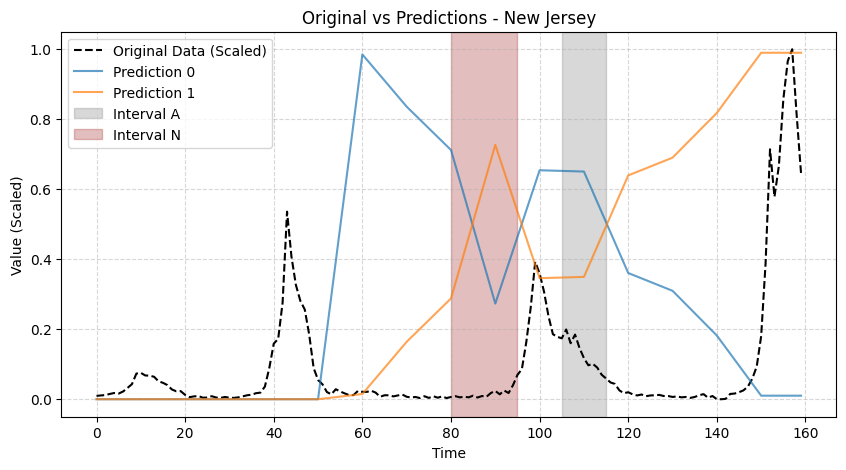

Padding predictions: Added 150 values.


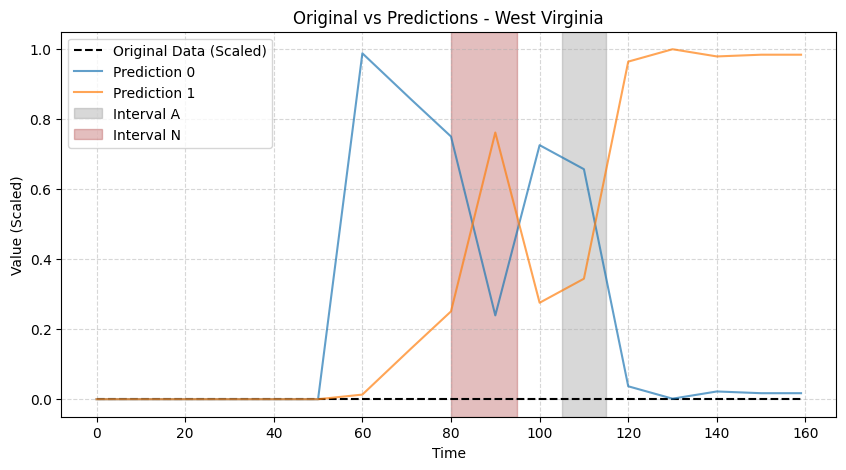

Padding predictions: Added 150 values.


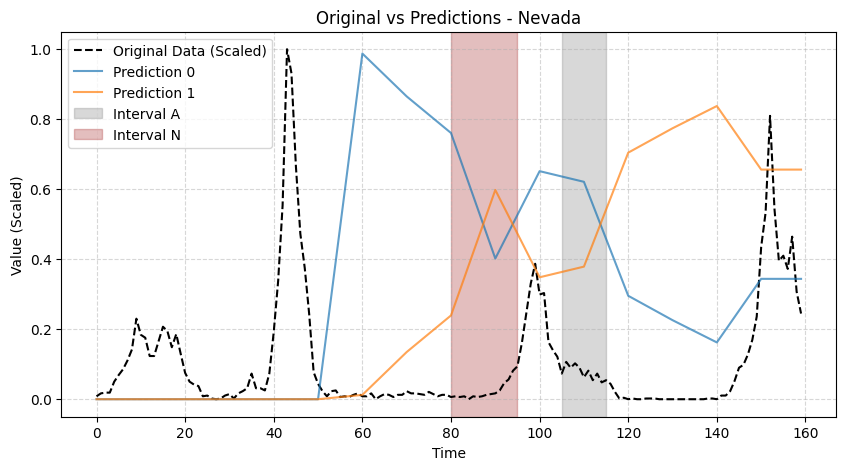

Padding predictions: Added 150 values.


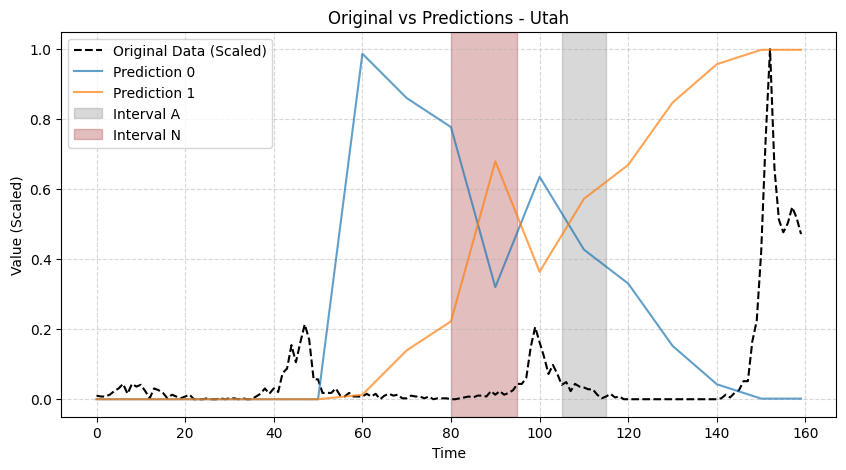

Padding predictions: Added 150 values.


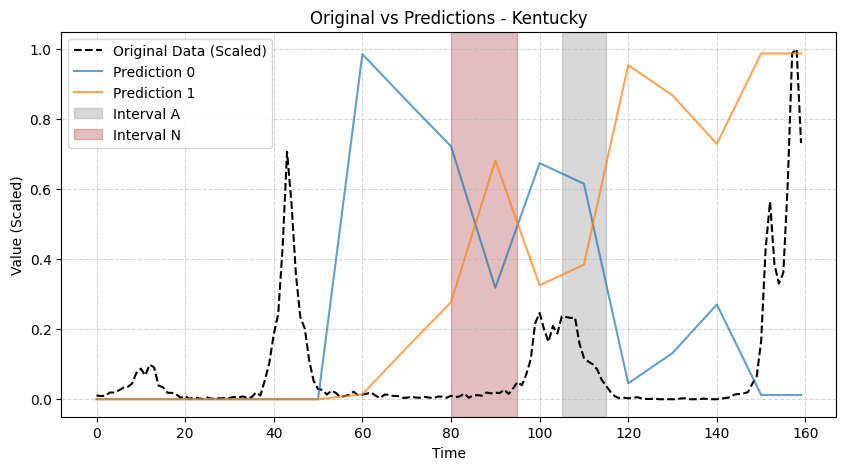

Padding predictions: Added 150 values.


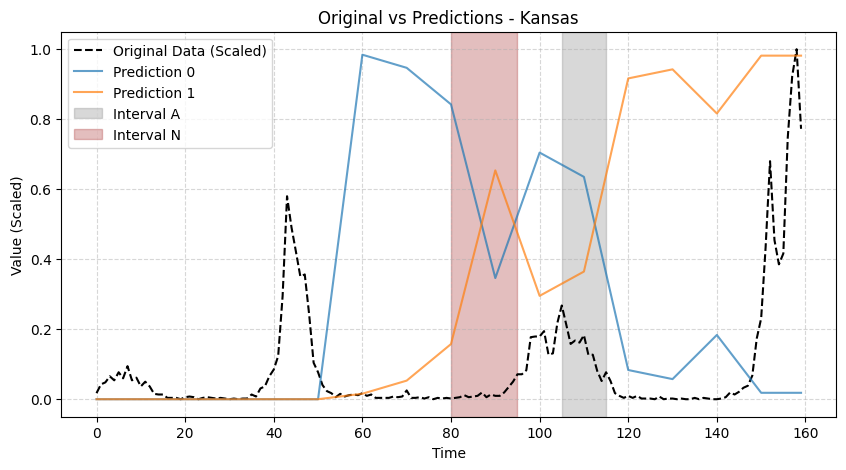

Padding predictions: Added 150 values.


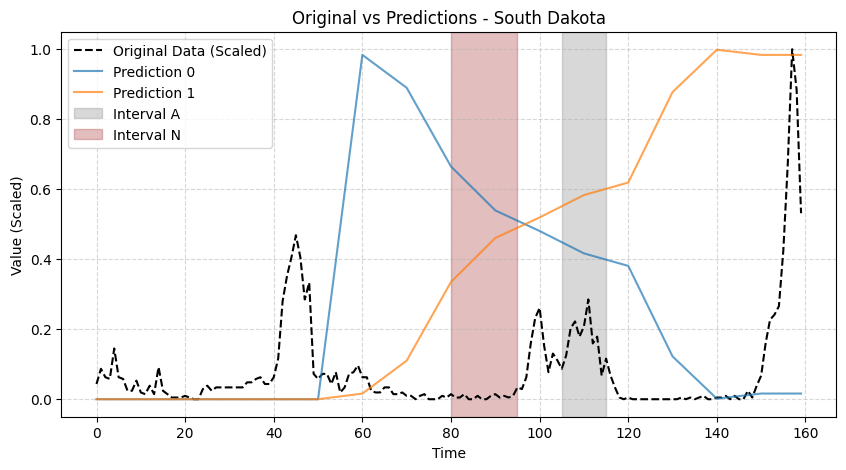

Padding predictions: Added 150 values.


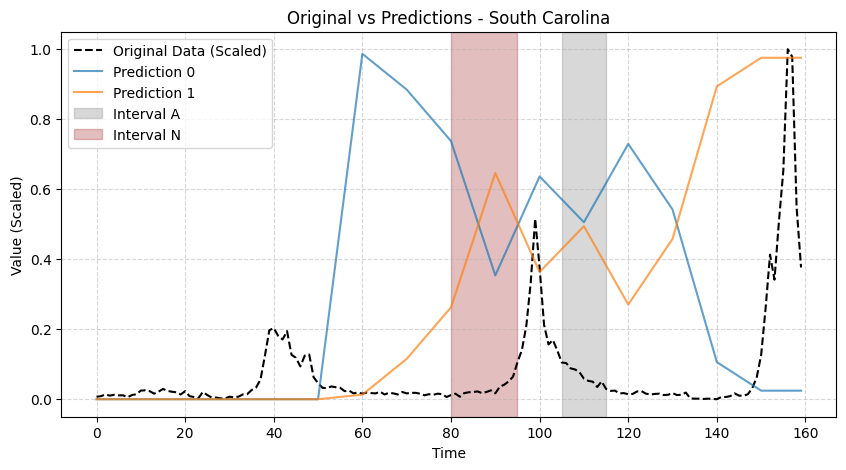

Padding predictions: Added 150 values.


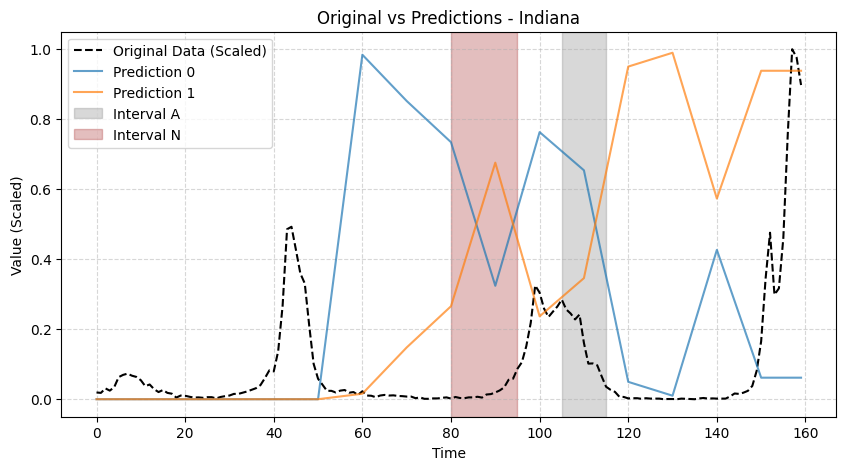

Padding predictions: Added 150 values.


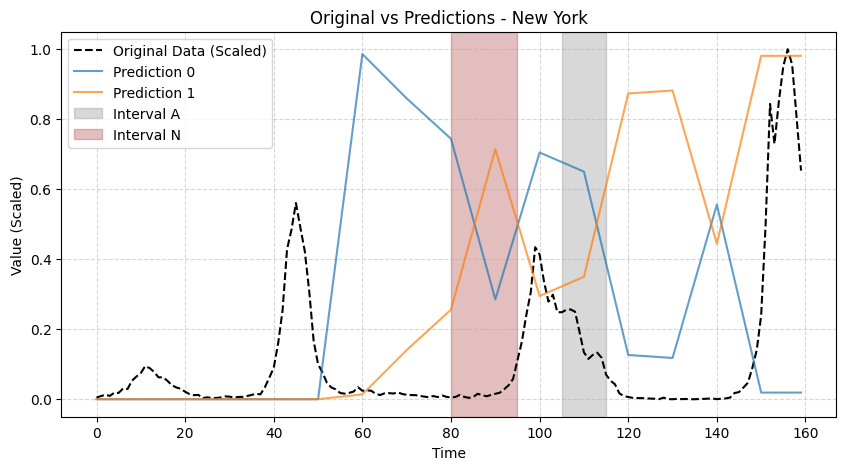

Padding predictions: Added 150 values.


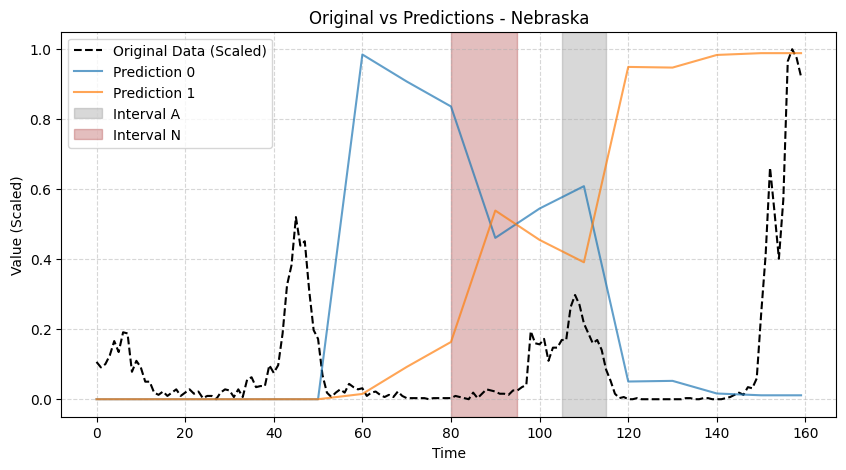

Padding predictions: Added 150 values.


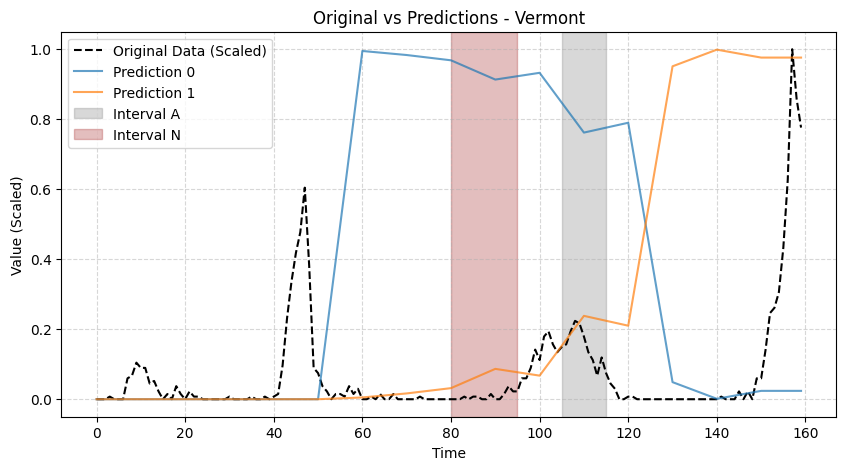

Padding predictions: Added 150 values.


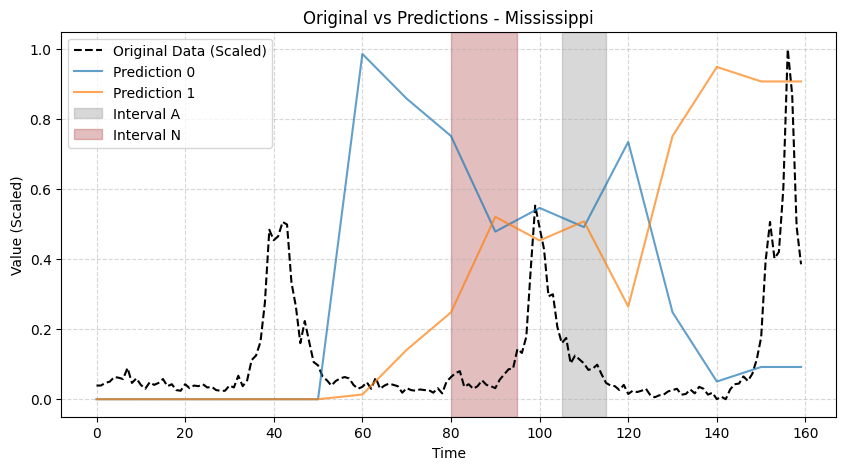

Padding predictions: Added 150 values.


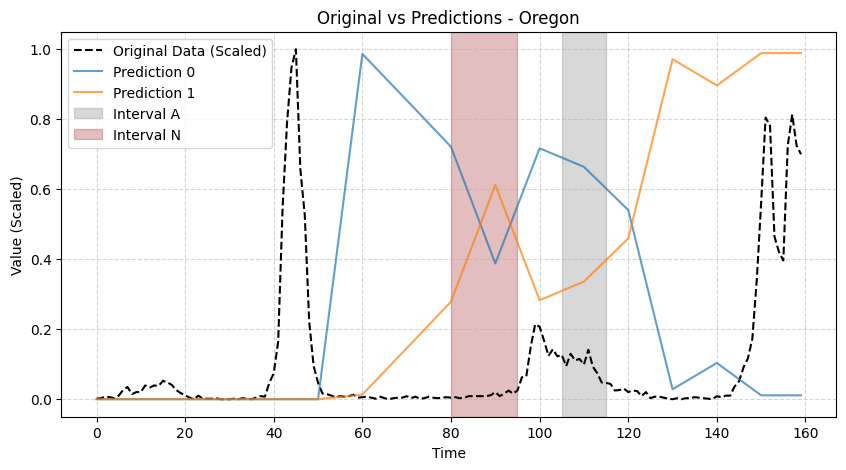

Padding predictions: Added 150 values.


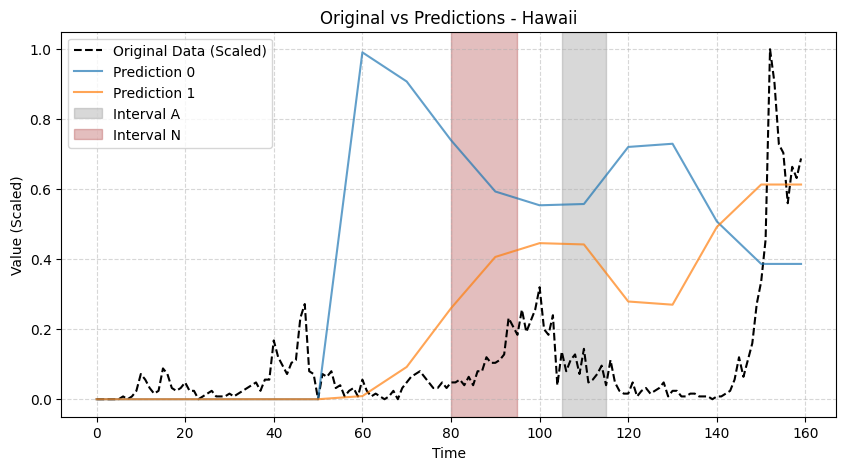

Padding predictions: Added 150 values.


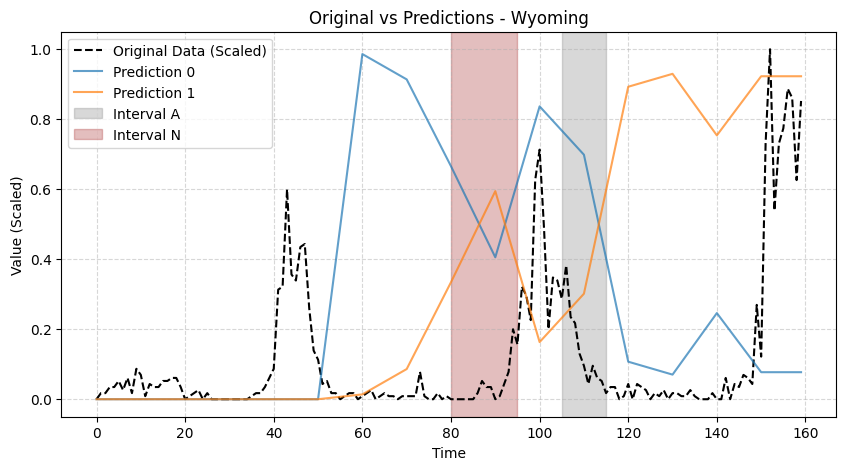

Padding predictions: Added 150 values.


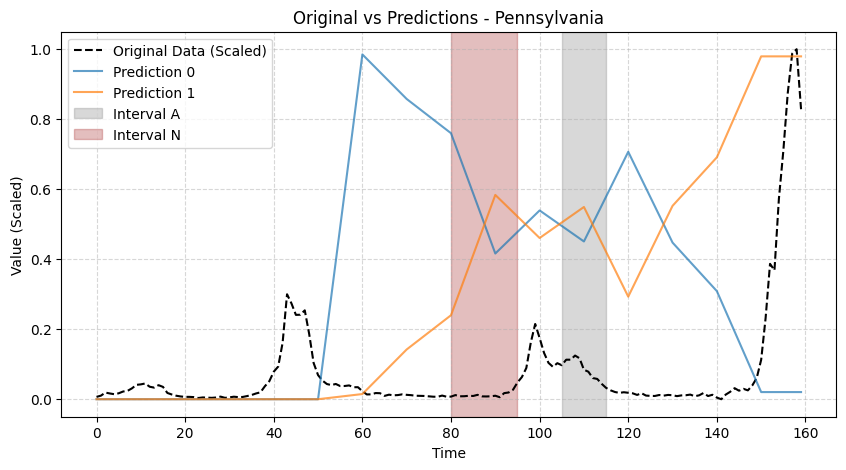

Padding predictions: Added 150 values.


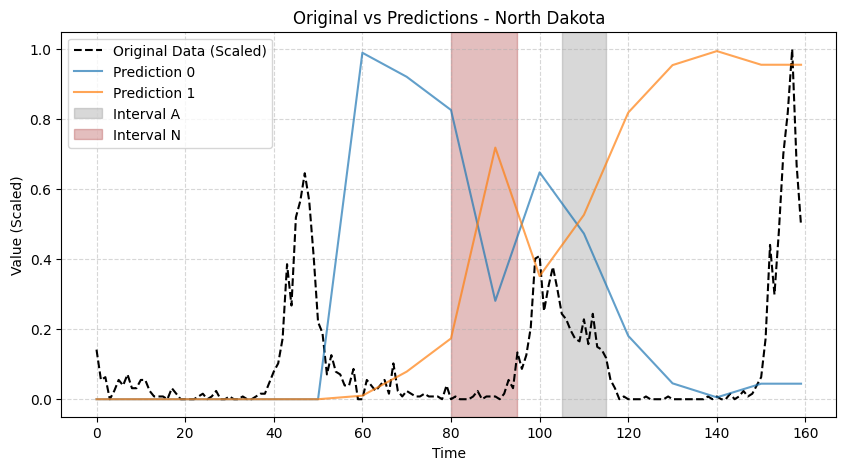

Padding predictions: Added 150 values.


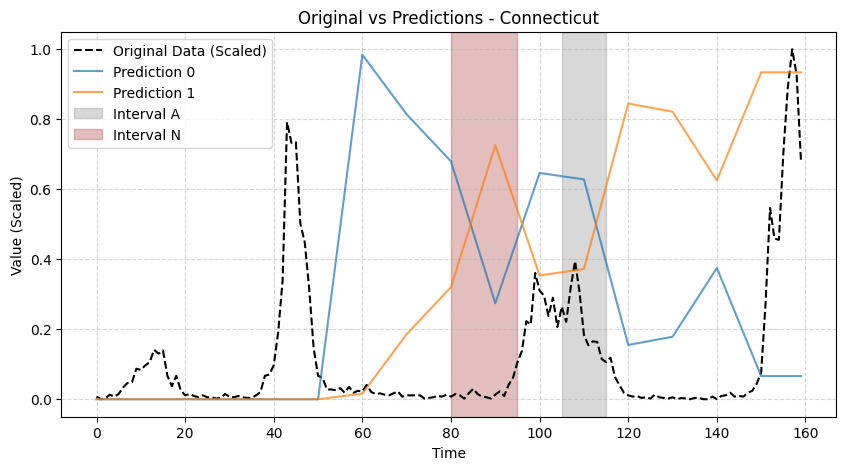

Padding predictions: Added 150 values.


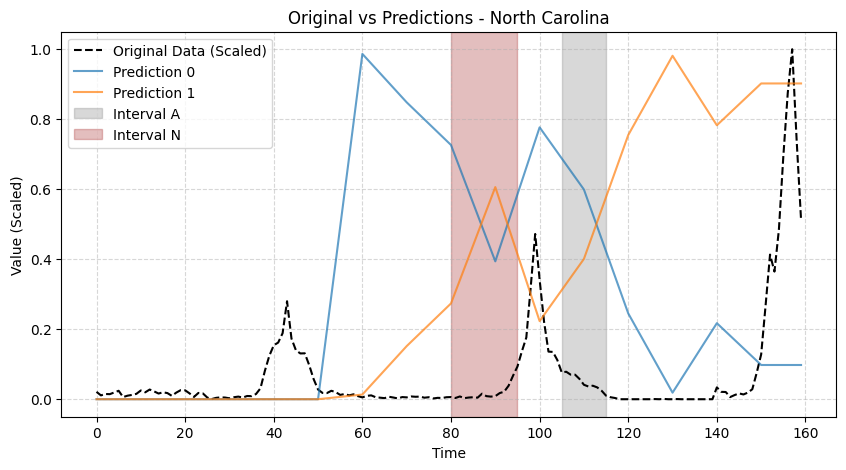

Padding predictions: Added 150 values.


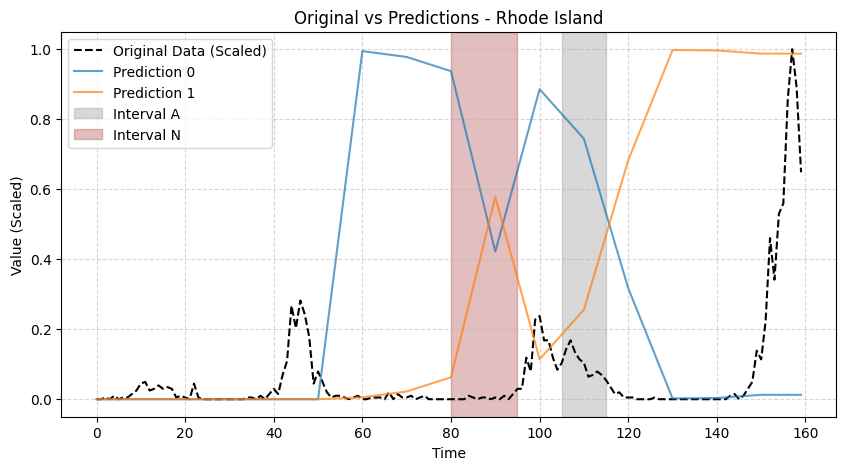

Padding predictions: Added 150 values.


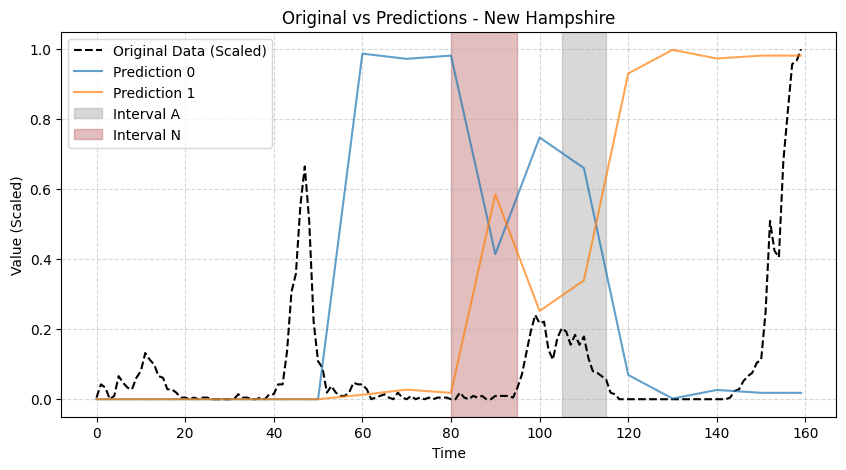

Padding predictions: Added 150 values.


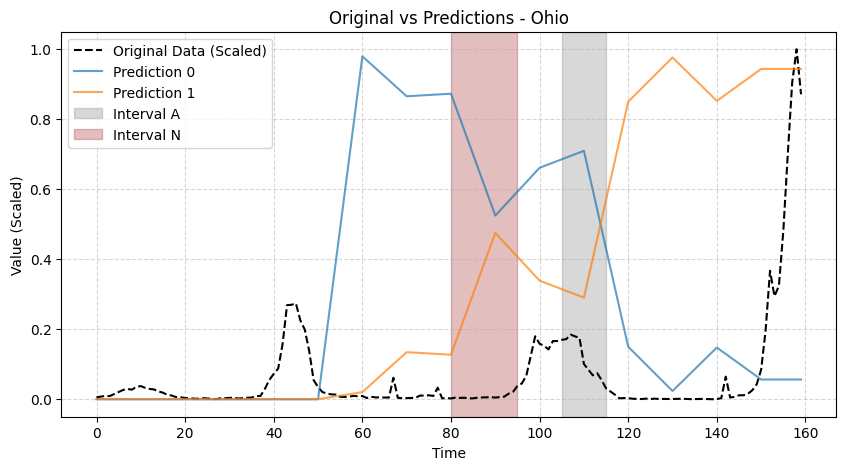

Padding predictions: Added 150 values.


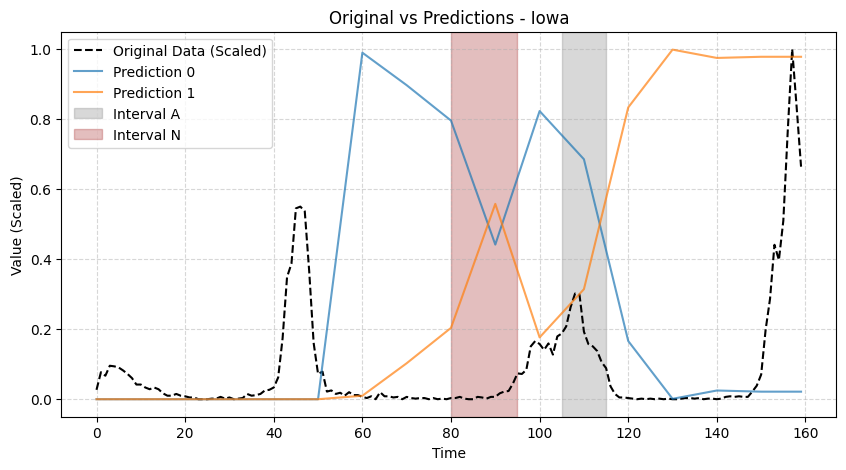

Padding predictions: Added 150 values.


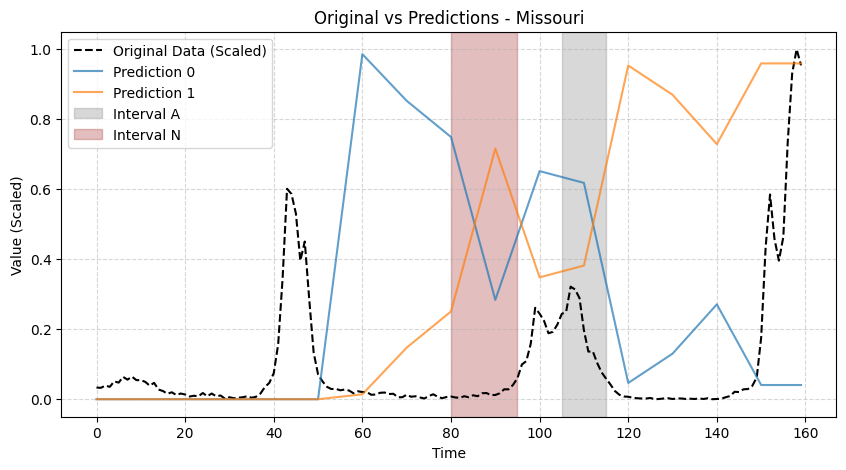

Padding predictions: Added 150 values.


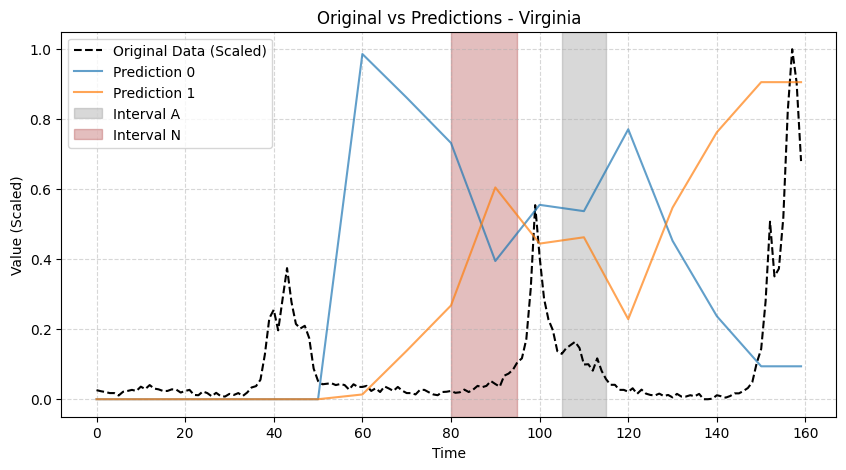

Padding predictions: Added 150 values.


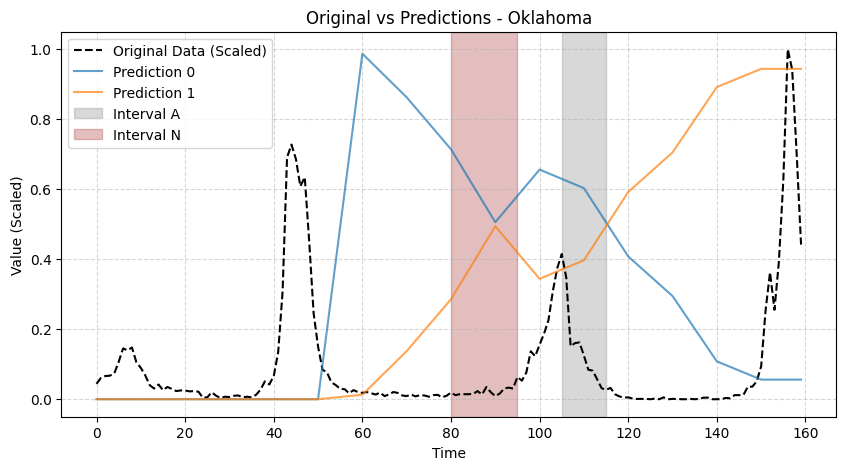

Padding predictions: Added 150 values.


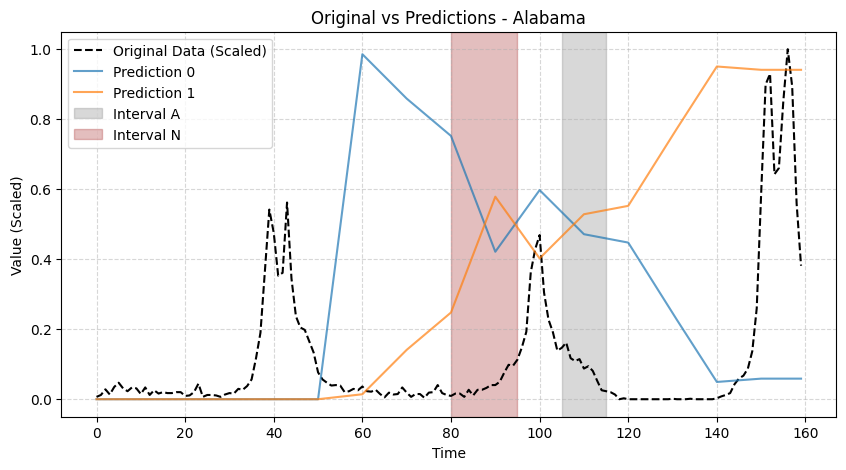

Padding predictions: Added 150 values.


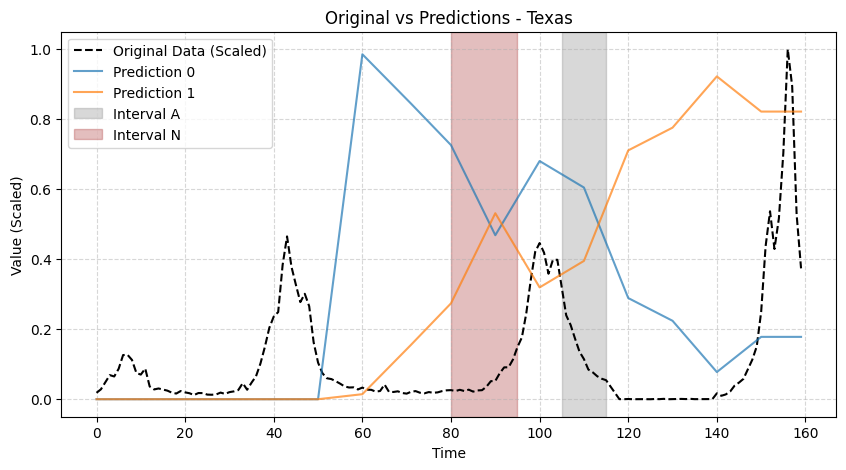

Padding predictions: Added 150 values.


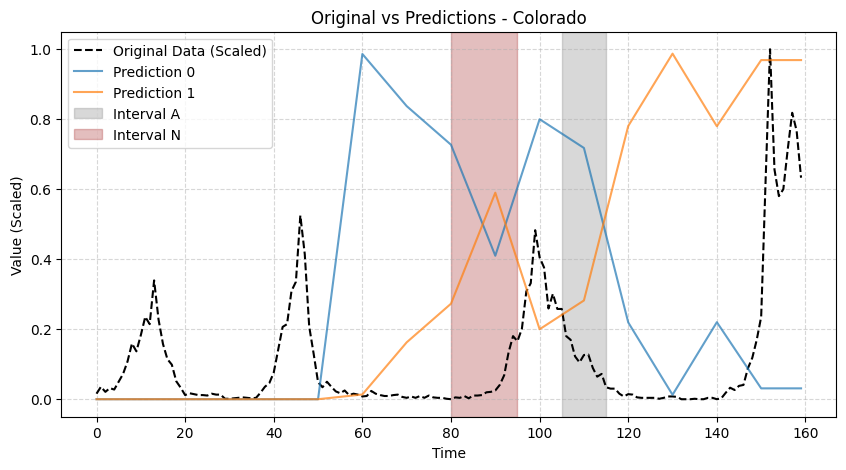

Padding predictions: Added 150 values.


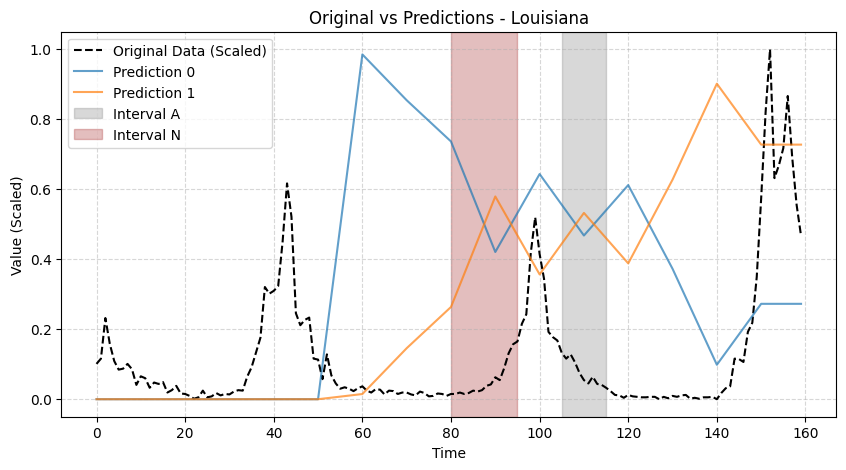

Padding predictions: Added 150 values.


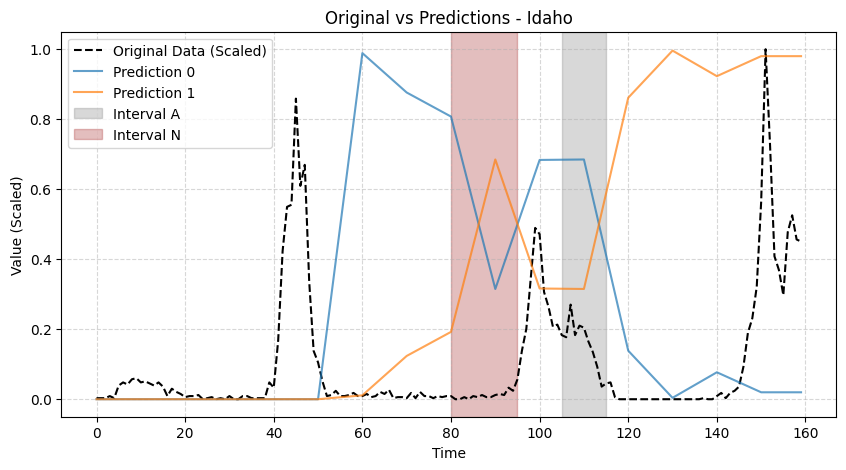

Padding predictions: Added 150 values.


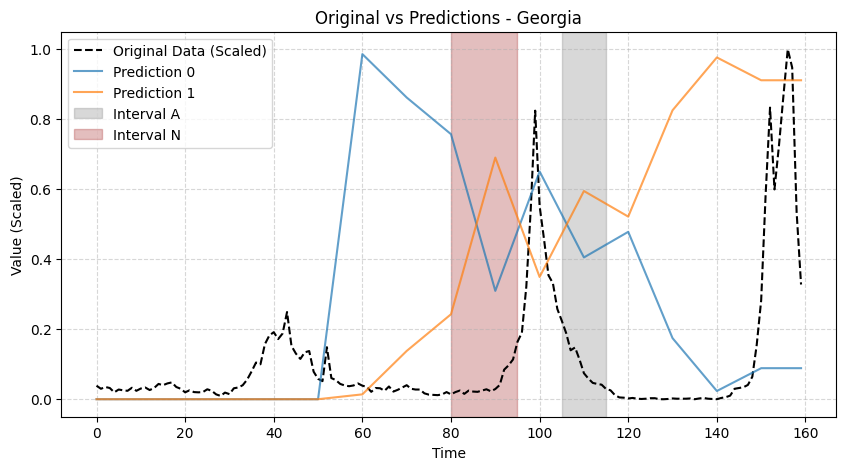

Padding predictions: Added 150 values.


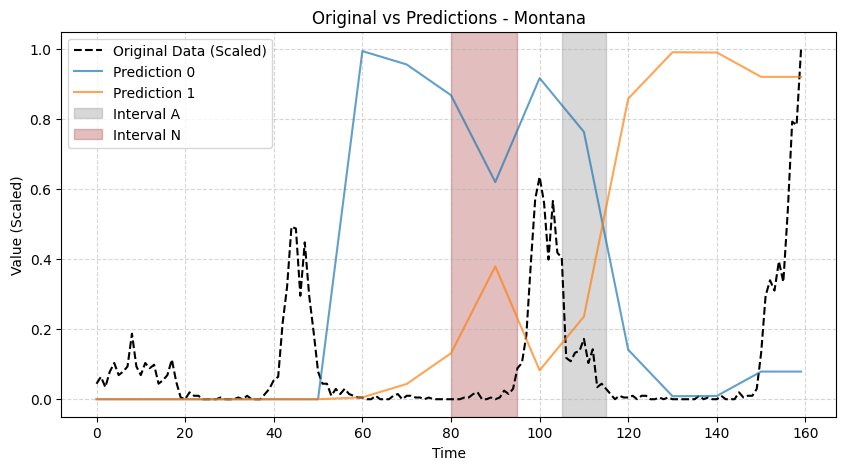

Padding predictions: Added 150 values.


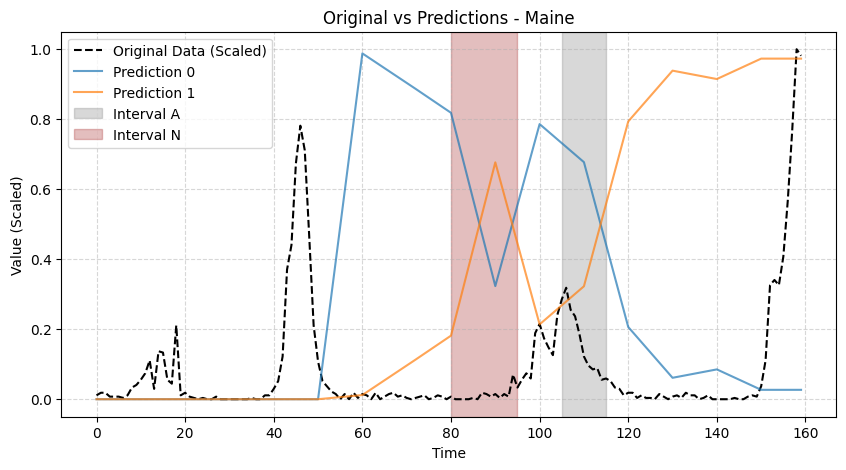

Padding predictions: Added 150 values.


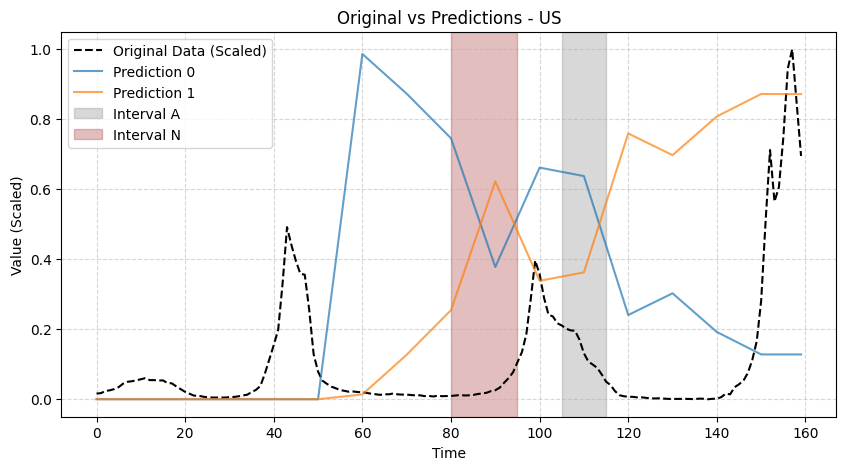

Padding predictions: Added 150 values.


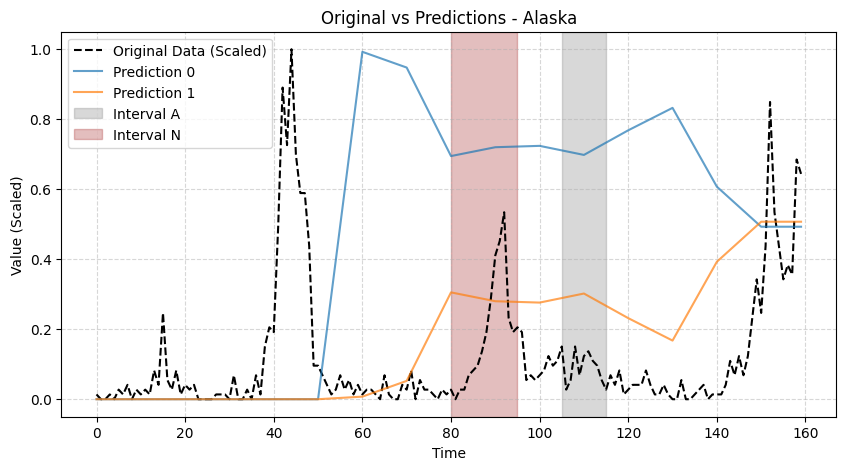

Padding predictions: Added 150 values.


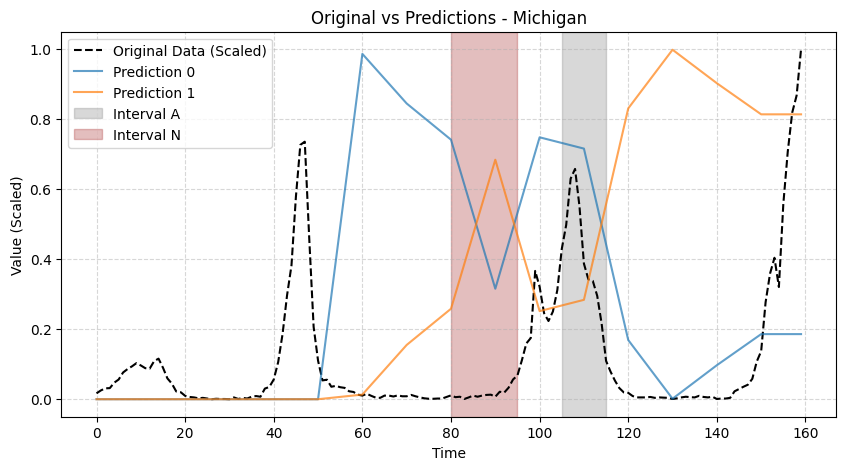

Padding predictions: Added 150 values.


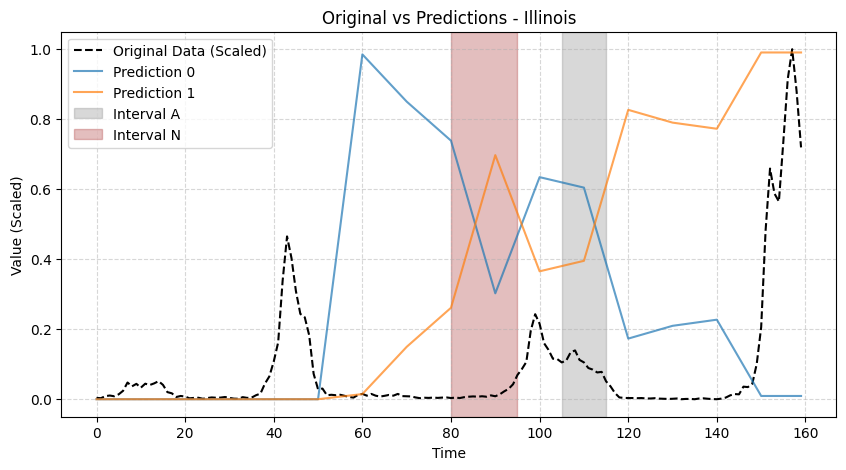

Padding predictions: Added 150 values.


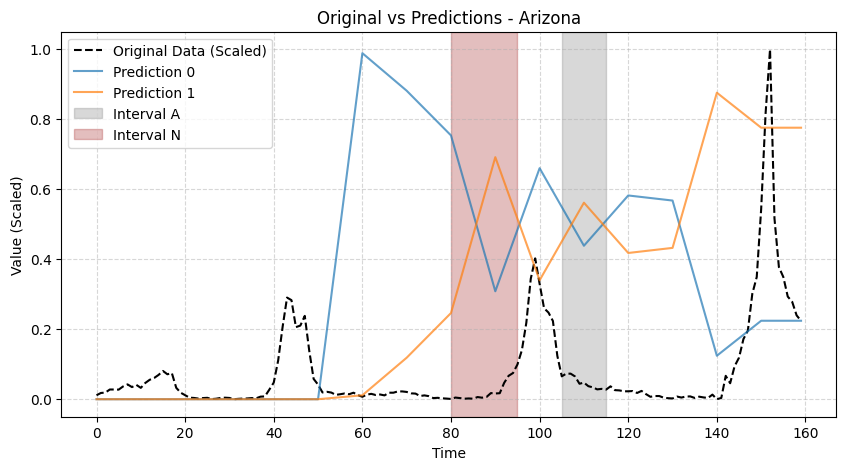

Padding predictions: Added 150 values.


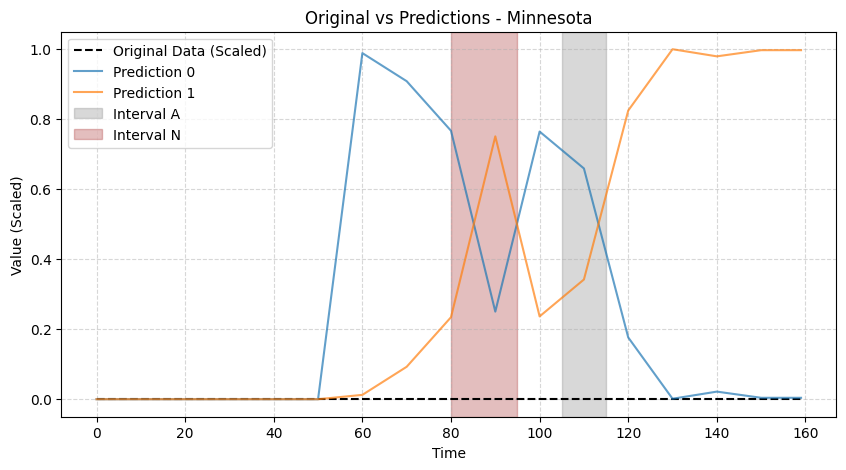

Padding predictions: Added 150 values.


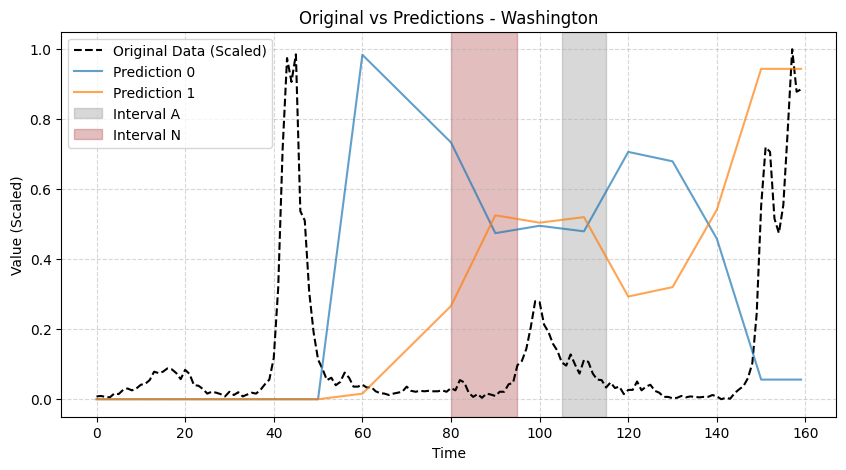

Padding predictions: Added 150 values.


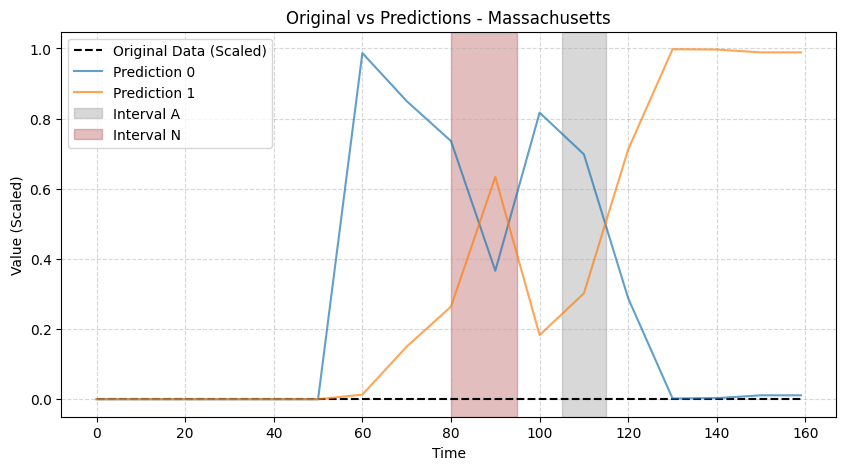

Padding predictions: Added 150 values.


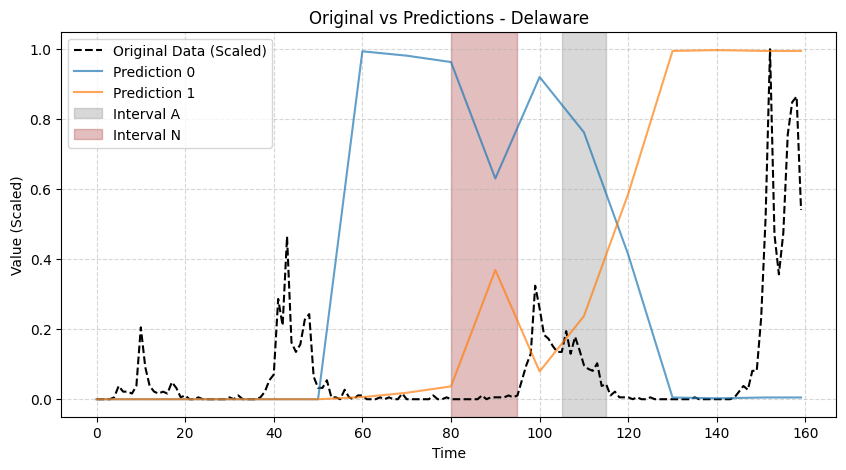

Padding predictions: Added 150 values.


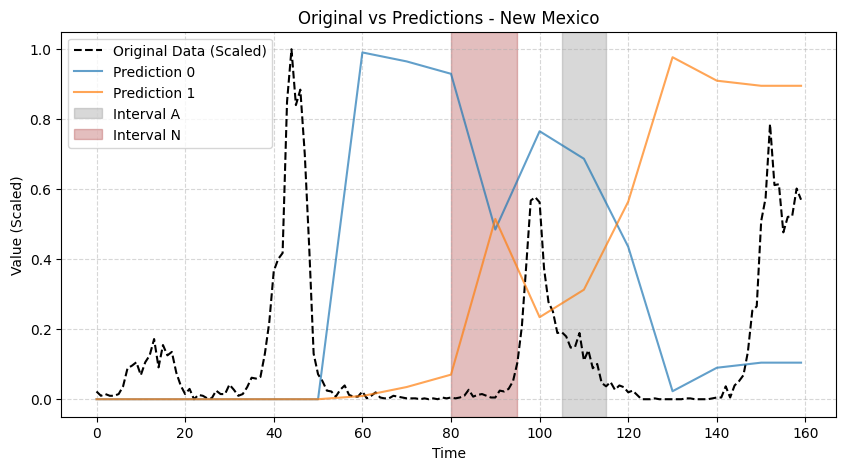

Padding predictions: Added 150 values.


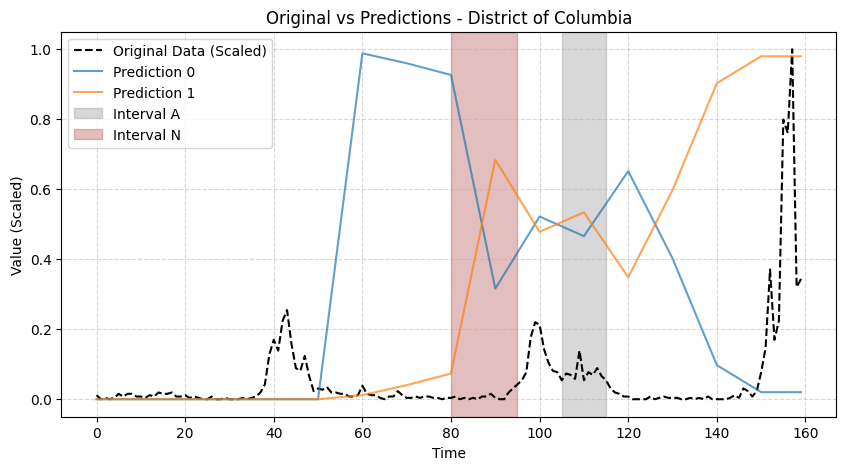

Padding predictions: Added 150 values.


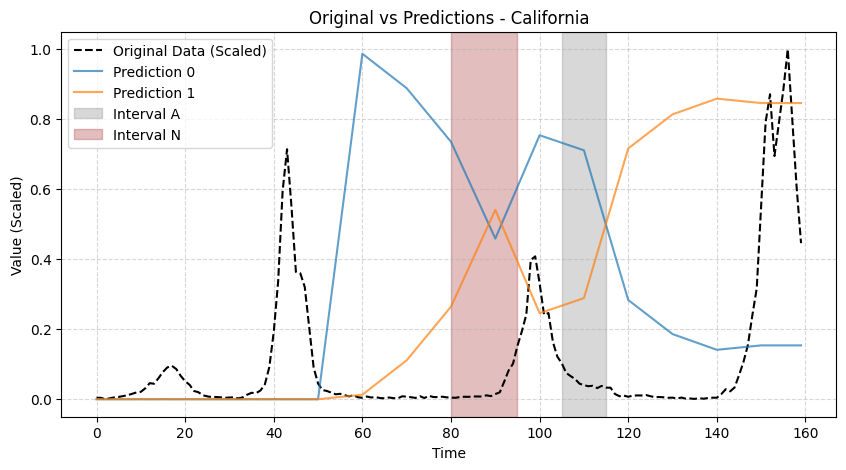

Padding predictions: Added 150 values.


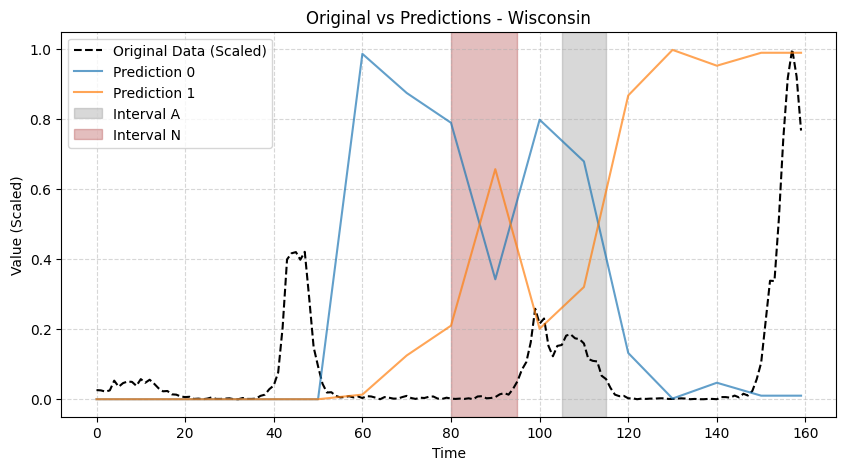

Padding predictions: Added 150 values.


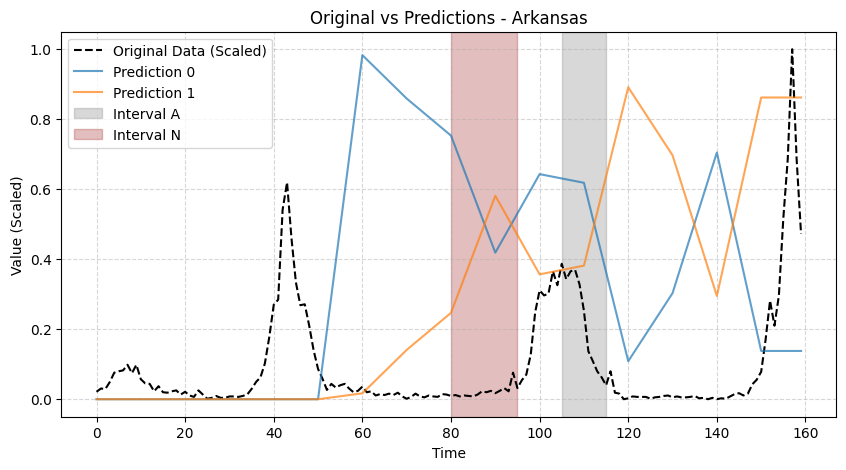

Padding predictions: Added 150 values.


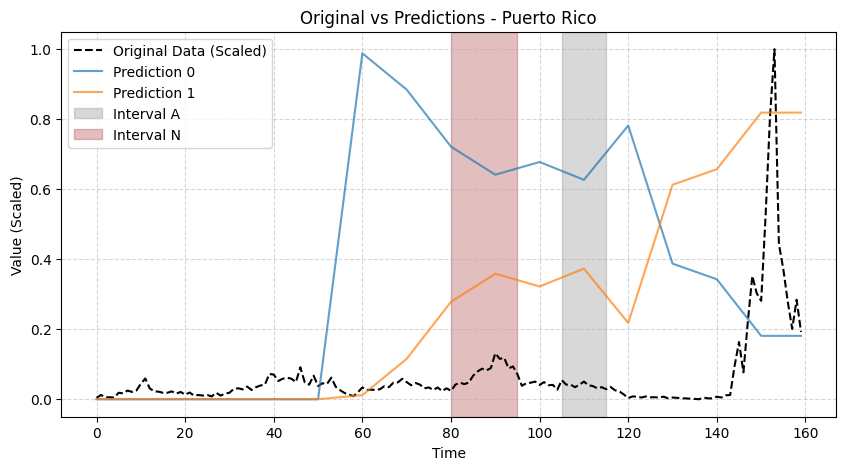

Padding predictions: Added 150 values.


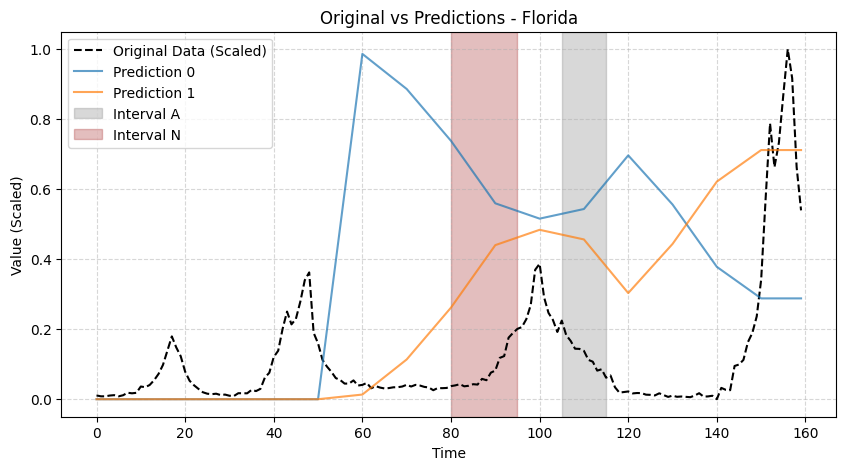

Padding predictions: Added 150 values.


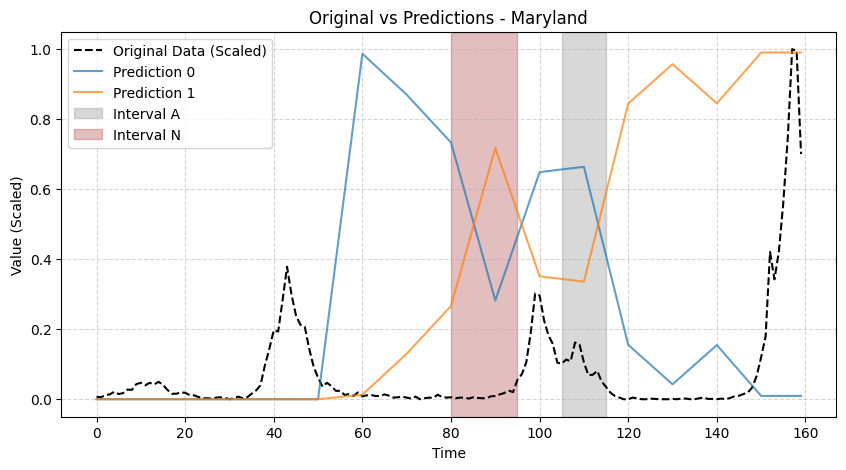

Padding predictions: Added 150 values.


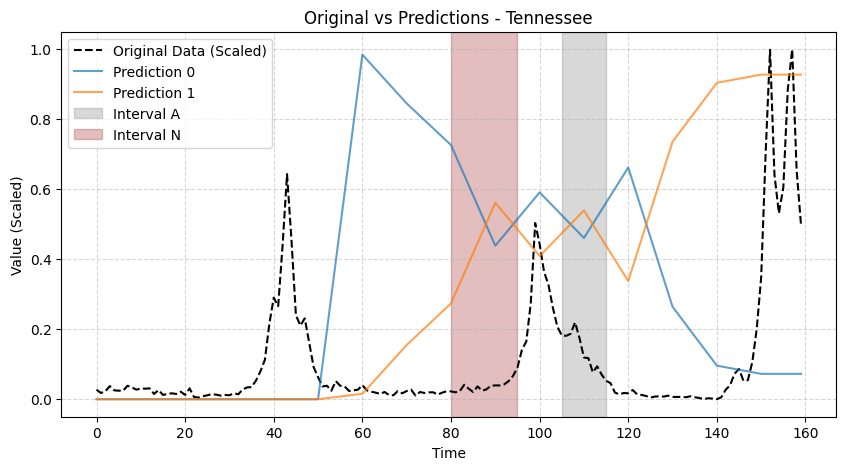

tpA: 0
tpB: 0
tp: 0
fp: 795
tn: 1325
fn: 530


In [ ]:
output_base_path = '/content/predictions_image_plots'

intervals = {
    "A": (105, 115),
    # "B": (127, 140),
    "N": (80, 95)
}

negative_interval = (75, 90)

tpA = 0
tpB = 0
tp = 0
fp = 0
tn = 0
fn = 0
count = 0
average_comparisons = {}

#--------------------#
# TP rate using Bifurcation Found by estimating Rt with EpyEstim


#--------------------#




def process_and_plot_csv(ensemble_predictions_path, input_array, output_base_path):
    """
    Reads CSV files, pads predictions, scales original data, and plots the simulated vs actual values.
    """
    global tpA
    global tpB
    global tn
    global tp
    global fp
    global fn
    global count

    # Ensure output directory is clean
    if os.path.exists(output_base_path):
        for root, dirs, files in os.walk(output_base_path, topdown=False):
            for name in files:
                os.remove(os.path.join(root, name))
            for name in dirs:
                os.rmdir(os.path.join(root, name))

    for filename in os.listdir(ensemble_predictions_path):
        if filename.endswith(".csv"):
            filepath = os.path.join(ensemble_predictions_path, filename)
            df = pd.read_csv(filepath)

            # Extract the name reliably from the filename
            name_parts = filename.replace(".csv", "").split("_")
            name = name_parts[-2] if len(name_parts) > 1 else name_parts[0]

            # input_array[name].plot()

            # Check if the name exists in input_array
            if name not in input_array:
                print(f"⚠ Warning: '{name}' not found in input_array. Skipping.")
                continue

            # Get the original data for scaling and comparison
            original_data = input_array[name]

            # Ensure original_data is a 1D array
            original_values = original_data.values.flatten()
            target_length = len(original_values)

            # Ensure the prediction data has the correct length (should be 1500)
            pred_length = len(df)

            # Check if predictions need padding or trimming
            if pred_length < target_length:
                padding_len = target_length - pred_length
                padded_predictions = np.pad(
                    df.values,
                    ((padding_len, 0), (0, 0)),  # Pad only the first axis (time)
                    mode="constant",
                    constant_values=0
                )
                print(f"Padding predictions: Added {padding_len} values.")
            elif pred_length > target_length:
                padded_predictions = df.values[-target_length:]  # Trim excess
                print(f"Trimming predictions: Removed {pred_length - target_length} values.")
            else:
                padded_predictions = df.values  # Already correct size

            df_padded = pd.DataFrame(padded_predictions, columns=df.columns)

            # Scale original data (0 to 1 normalization)
            data_min, data_max = original_values.min(), original_values.max()
            scaled_original = (original_values - data_min) / (data_max - data_min) if data_max > data_min else np.zeros_like(original_values)

            # Create time axis with correct length
            time = np.arange(target_length)

            # Create output folder for this state
            state_folder = os.path.join(output_base_path, name)
            os.makedirs(state_folder, exist_ok=True)

            # Plot original and predictions on the same plot
            plt.figure(figsize=(10, 5))

            # Plot the scaled original data
            plt.plot(time, scaled_original, label="Original Data (Scaled)", linestyle="dashed", color="black")

            transition_col = df_padded.iloc[:, 1]
            null_col = df_padded.iloc[:, 0]


            interval_a_transition = transition_col.iloc[intervals["A"][0]:intervals["A"][1]]
            interval_a_null = null_col.iloc[intervals["A"][0]:intervals["A"][1]]
            # interval_b = transition_col.iloc[intervals["B"][0]:intervals["B"][1]]
            interval_n_transition = transition_col.iloc[intervals["N"][0]:intervals["N"][1]]
            interval_n_null = null_col.iloc[intervals["N"][0]:intervals["N"][1]]
            # interval_b = transition_col.between(*intervals["B"])

            # average_comparisons[name] = {
            #     "A": interval_a_transition.mean(),
            #     # "B": interval_b.mean()
            # }

            # if (interval_a_transition.mean() >= 0.6):
            #   tpA += 1
            #   tp += 1
            # else:
            #   fn += 1
            # if (interval_a_null.mean() < 0.6):
            #   tn += 1
            # else:
            #   fp += 1

            # # if (interval_b.mean() >= 0.6):
            # #   tpB += 1
            # #   tp += 1
            # # else:
            # #   fn += 1

            # for val in interval_n_transition:
            #   if val < 0.6:
            #     tn += 1
            #   else:
            #     fp += 1
            # for val in interval_n_null:
            #   if val >= 0.6:
            #     tn += 1
            #   else:
            #     fp += 1

            average_comparisons[name] = {
                "A_t": interval_a_transition.mean(),
                "A_n": interval_a_null.mean(),
                "N_t": interval_n_transition.mean(),
                "N_n": interval_n_null.mean(),
                # "B": interval_b.mean()
            }

            # if (interval_a_transition.mean() >= 0.6):
            #   tpA += 1
            #   tp += 1
            # else:
            #   fn += 1
            # if (interval_a_null.mean() < 0.6):
            #   tn += 1
            # else:
            #   fp += 1

            # if (interval_n_transition.mean() < 0.6):
            #   tn += 1
            # else:
            #   fp += 1
            # if (interval_n_null.mean() >= 0.6):
            #   tn += 1
            # else:
            #   fp += 1
            for val in interval_a_transition:
              if val >= 0.6:
                  tpA += 1
                  tp += 1
              else:
                  fn += 1

            for val in interval_a_null:
                if val < 0.6:
                    tn += 1
                else:
                    fp += 1

            for val in interval_n_transition:
                if val < 0.6:
                    tn += 1
                else:
                    fp += 1

            for val in interval_n_null:
                if val >= 0.6:
                    tn += 1
                else:
                    fp += 1



            count += 1





            # Plot each prediction column (if there are multiple)
            # for col_idx in range(df_padded.shape[1]):
            #     # print(col_idx)
            #     plt.plot(time, df_padded.iloc[:, col_idx], label=f"Prediction {df_padded.columns[col_idx]}", alpha=0.7)
            prediction_timestep = mult_factor_global  # since predictions are every 5 points
            prediction_indices = np.arange(0, target_length, prediction_timestep)

            # If predictions were padded, slice them down to actual sampled points
            for col_idx in range(df_padded.shape[1]):
                pred_col = df_padded.iloc[:, col_idx].values

                # Ensure prediction and indices align
                trimmed_preds = pred_col[-len(prediction_indices):]  # in case of padding

                # Interpolate to match full time resolution
                interpolated_preds = np.interp(time, prediction_indices, trimmed_preds)

                plt.plot(time, interpolated_preds, label=f"Prediction {df_padded.columns[col_idx]}", alpha=0.7)

            # Add gray shading for intervals A and B
            colors = ['gray', 'brown', 'lightgreen', 'salmon']
            for i, (label, (start, end)) in enumerate(intervals.items()):
              plt.axvspan(start, end, color=colors[i], alpha=0.3, label=f'Interval {label}')

            # Add titles, labels, and legend
            plt.title(f"Original vs Predictions - {name}")
            plt.xlabel("Time")
            plt.ylabel("Value (Scaled)")
            plt.legend()
            plt.grid(True, linestyle="--", alpha=0.5)
            plt.show()

            # Save plot
            plot_path = os.path.join(state_folder, f"{name}_combined_plot.png")
            plt.savefig(plot_path, dpi=300)
            plt.close()  # Close figure to free memory

process_and_plot_csv(ensemble_predictions_path, input_array, output_base_path)
print(f"tpA: {tpA}")
print(f"tpB: {tpB}")
print(f"tp: {tp}")
print(f"fp: {fp}")
print(f"tn: {tn}")
print(f"fn: {fn}")
# print(f"count: {count}")
# print(average_comparisons)



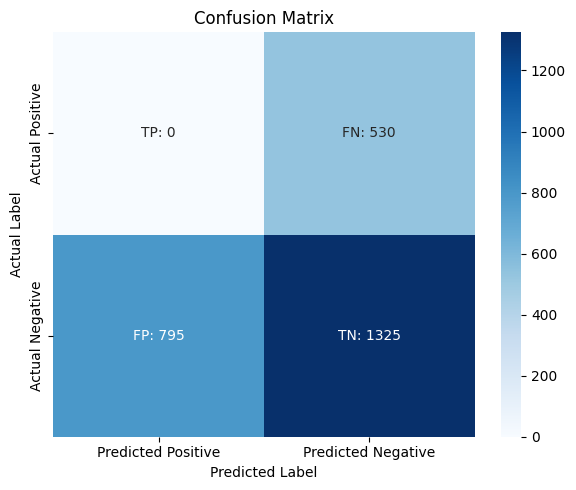

The model achieved an accuracy of 50.00%, precision of 0.00%, recall of 0.00%, F1 score of 0.00%, and specificity of 62.50%.


In [ ]:
# COnfusion Matrix
import seaborn as sns
conf_matrix = pd.DataFrame(
    [[tp, fn], [fp, tn]],
    index=['Actual Positive', 'Actual Negative'],
    columns=['Predicted Positive', 'Predicted Negative']
)

# Display as a styled table
conf_matrix.style.set_caption("Confusion Matrix").format("{:.0f}")

conf_array = [[tp, fn],
              [fp, tn]]

# Labels
labels = [['TP: {}'.format(tp), 'FN: {}'.format(fn)],
          ['FP: {}'.format(fp), 'TN: {}'.format(tn)]]

plt.figure(figsize=(6, 5))
sns.heatmap(conf_array, annot=labels, fmt='', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])

plt.title("Confusion Matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Print all metrics in one sentence
print(
    f"The model achieved an accuracy of {accuracy:.2%}, "
    f"precision of {precision:.2%}, recall of {recall:.2%}, "
    f"F1 score of {f1_score:.2%}, and specificity of {specificity:.2%}."
)

In [ ]:
def plot_average_comparisons(average_comparisons):
    states = list(average_comparisons.keys())
    values_a = [average_comparisons[state]["A"] for state in states]
    values_b = [average_comparisons[state]["B"] for state in states]

    x = np.arange(len(states))  # Bar positions
    width = 0.35  # Bar width

    fig, ax = plt.subplots(figsize=(18, 6))
    bars1 = ax.bar(x - width/2, values_a, width, label="Interval A (108-118)", color="black", alpha=0.7)
    bars2 = ax.bar(x + width/2, values_b, width, label="Interval B (127-140)", color="red", alpha=0.7)

    ax.set_xlabel("States")
    ax.set_ylabel("Average Values")
    ax.set_title("Average Comparisons by State")
    ax.set_xticks(x)
    ax.set_xticklabels(states, rotation=45, ha="right")
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    plt.show()

plot_average_comparisons(average_comparisons)

KeyError: 'A'

In [ ]:
count = 1
names = []
import csv
for filename in os.listdir(ensemble_predictions_path):
        if filename.endswith(".csv"):
            filepath = os.path.join(ensemble_predictions_path, filename)
            df = pd.read_csv(filepath)

            # Extract the name reliably from the filename
            name_parts = filename.replace(".csv", "").split("_")
            name = name_parts[-2] if len(name_parts) > 1 else name_parts[0]
            count += 1
            names.append(name)
            # print(name)
print(names)
with open("names.csv", "w", newline="") as f:
  writer = csv.writer(f)
  for name in names:
      writer.writerow([name])  # Each name goes into its own row

print(count)

# Basic Plots

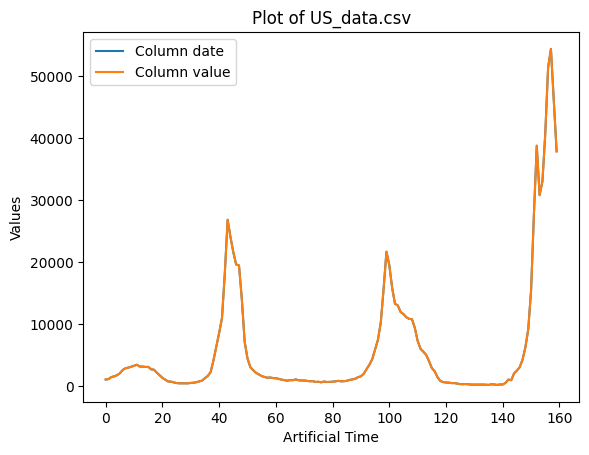

Plot saved to /content/predictions_image_plots/US_data_plot.png


In [ ]:
output_base_path = '/content/predictions_image_plots'

def plot_csv(csv_path, output_path):
    """
    Reads a CSV file from the given path, plots its columns against an artificial time index,
    and saves the plot as a PNG image in the specified output directory.
    """
    # Read CSV into a DataFrame
    df = pd.read_csv(csv_path)
    # return df
    # Create an artificial time index if the DataFrame doesn't have one
    time = np.arange(len(df))  # Artificial time axis

    # Create output directory if it doesn't exist
    os.makedirs(output_path, exist_ok=True)

    # Plot each column
    plt.figure()
    # print(df)
    for col in df.columns:
        plt.plot(time, df['value'], label=f'Column {col}')

    plt.title(f"Plot of {os.path.basename(csv_path)}")
    plt.xlabel('Artificial Time')
    plt.ylabel('Values')
    plt.legend()
    plt.show()
    # Save the plot as a PNG image
    output_file = os.path.join(output_path, f"{os.path.basename(csv_path).split('.')[0]}_plot.png")
    plt.savefig(output_file)
    plt.close()

    print(f"Plot saved to {output_file}")

y_pred_path = "/content/state_data_epyestim/US_data.csv"
plot_csv(y_pred_path, output_base_path)

In [ ]:
df

Time          I
0        0.0   0.464932
1        1.0   0.151487
2        2.0   0.236079
3        3.0   0.636389
4        4.0   0.159177
...      ...        ...
1495  1495.0  24.393413
1496  1496.0  19.796114
1497  1497.0  21.830446
1498  1498.0  29.367300
1499  1499.0  18.984534

[1500 rows x 2 columns]

In [ ]:
!wget https://zenodo.org/records/10841970/files/training_data_EnvN.zip?download=1

--2025-03-28 22:18:44--  https://zenodo.org/records/10841970/files/training_data_EnvN.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 988945565 (943M) [application/octet-stream]
Saving to: ‘training_data_EnvN.zip?download=1’

training_data_EnvN. 100%[===================>] 943.13M  70.6MB/s    in 13s     

2025-03-28 22:18:57 (70.7 MB/s) - ‘training_data_EnvN.zip?download=1’ saved [988945565/988945565]



In [ ]:
!unzip /content/training_data_EnvN.zip?download=1 -d /content/data1

Streaming output truncated to the last 5000 lines.
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25001.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25002.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25003.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25004.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25005.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25006.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25007.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25008.csv  
  inflating: /content/data1/data_train_EnvN_PreTransition_30K/output_sims_set-3_Mixed/tseries25009.csv  
  in

In [ ]:
output_base_path = '/content/predictions_image_plots'

if os.path.exists(output_base_path):
    for root, dirs, files in os.walk(output_base_path, topdown=False):
        for name in files:
            os.remove(os.path.join(root, name))  # Delete files
        for name in dirs:
            os.rmdir(os.path.join(root, name))  # Delete directories


for filename in os.listdir(ensemble_predictions_path):
    if filename.endswith('.csv'):
        filepath = os.path.join(ensemble_predictions_path, filename)
        df = pd.read_csv(filepath)  # Read the CSV file into a pandas DataFrame


        df.columns = range(1, len(df.columns) + 1)
        # Create an artificial time axis using the number of rows in the DataFrame
        time = np.arange(len(df))

        name = filename.split('_')[-2].split('.')[0]

        state_folder = os.path.join(output_base_path, name)
        os.makedirs(state_folder, exist_ok=True)

        # plt.figure()
        print(name)
        plt.figure()  # Create a new figure for the input array plot
        # input_array[name] = input_array[name].dropna()
        ax = input_array[name].plot()#.iloc[from_time:to_time].reset_index(drop=True).plot()
        # Get the figure
        fig = ax.get_figure()

        # Save the figure as a PNG image
        fig.savefig(os.path.join(state_folder, f"{name}_input_array_plot.png"))
        plt.title(f"Input Array Plot - {name}")

        plt.figure()  # Create a new figure for the DataFrame plot
        ax2 = df.plot()
        # Get the figure
        fig2 = ax2.get_figure()

        '''Save the figure as a PNG image'''
        # fig2.savefig(os.path.join(state_folder, f"{name}_dataframe_plot.png"))
        plt.title(f"DataFrame Plot - {filename}")

        plt.show()  # Display both plots
        # Plot all three columns against time
        plt.plot(time, df.iloc[:, 0], label='Column 1')
        plt.plot(time, df.iloc[:, 1], label='Column 2')
        plt.plot(time, df.iloc[:, 2], label='Column 3')
        # plt.plot(time, df.iloc[:, 3], label='Column 4')

        plt.title(filename)  # Set the title of the plot to the filename
        plt.xlabel('Artificial Time')  # Set the x-axis label
        plt.ylabel('Values')  # Set the y-axis label
        plt.legend()  # Show legend to distinguish the columns
        plt.show()  # Display the plot

Skipping Virginia as no corresponding original data found.
Skipping Wyoming as no corresponding original data found.
Plotting complete.


In [ ]:
import shutil
shutil.make_archive(output_base_path.replace('.zip', ''), 'zip', output_base_path)

'/content/predictions_image_plots3.zip'